# Set up

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Projects/1. Churn Prediction/

/content/drive/MyDrive/Projects/1. Churn Prediction


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [4]:
os.getcwd()

'/content/drive/MyDrive/Projects/1. Churn Prediction'

# Importing datasets

In [5]:
# descriptions of columns in other datasets
DATASET_DICT = "telecom_data_dictionary.csv"

# data containing customer information and churn target variable
DATASET_CHURN = "telecom_customer_churn.csv"

# populations of zipcodes
DATASET_ZIP_POP = "telecom_zipcode_population.csv"

In [6]:
df_dict = pd.read_csv(DATASET_DICT, encoding='unicode_escape')
df_dict.shape

(40, 3)

In [7]:
df_dict.head()

Table                 Field  \
0  Customer Churn            CustomerID   
1  Customer Churn                Gender   
2  Customer Churn                   Age   
3  Customer Churn               Married   
4  Customer Churn  Number of Dependents   

                                         Description  
0          A unique ID that identifies each customer  
1                The customers gender: Male, Female  
2  The customers current age, in years, at the t...  
3      Indicates if the customer is married: Yes, No  
4  Indicates the number of dependents that live w...

In [8]:
df_churn = pd.read_csv(DATASET_CHURN)
df_churn.shape

(7043, 38)

In [9]:
df_churn.head()

Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   Zip Code   Latitude   Longitude  Number of Referrals  ...   Payment Method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   
3     94553  38.014457 -122.115432                    1  ...  Bank Withdrawal   
4     93010  34.227846 -119.079903                    3  ...      Credit Card   

  Monthly Charge Total Charges  Total Refunds Total Extra Data Charges  \
0           65.6        593.30           0.00                        0   
1           -4.0        542.40          38.33                       10   
2           73.9        280.85           0.00                        0   
3           98.0       1237.85           0.00                        0   
4           83.9        267.40           0.00                        0   

  Total Long Distance Charges Total Revenue  Customer Status   Churn Category  \
0                      381.51        974.81           Stayed              NaN   
1                       96.21        610.28           Stayed              NaN   
2                      134.60        415.45          Churned       Competitor   
3                      361.66       1599.51          Churned  Dissatisfaction   
4                       22.14        289.54          Churned  Dissatisfaction   

                    Churn Reason  
0                            NaN  
1                            NaN  
2  Competitor had better devices  
3        Product dissatisfaction  
4            Network reliability  

[5 rows x 38 columns]

In [10]:
df_zip = pd.read_csv(DATASET_ZIP_POP, encoding='unicode_escape')
df_zip.shape

(1671, 2)

In [11]:
df_zip.head()

Zip Code  Population
0     90001       54492
1     90002       44586
2     90003       58198
3     90004       67852
4     90005       43019

In [12]:
df_zip[df_zip["Zip Code"]==93225]

Zip Code  Population
660     93225        4498

## Adding Zip Code Population data to Churn dataset

In [13]:
# joining churn dataset and zip code pop. dataset on Zip Code
df_churn = df_churn.join(df_zip.set_index("Zip Code"), on="Zip Code")

In [14]:
# repositioning Customer Status (target variable) at the end
df_churn["Customer Status"] = df_churn.pop("Customer Status")

In [15]:
df_churn.shape

(7043, 39)

In [16]:
df_churn.head()

Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   Zip Code   Latitude   Longitude  Number of Referrals  ...  Monthly Charge  \
0     93225  34.827662 -118.999073                    2  ...            65.6   
1     91206  34.162515 -118.203869                    0  ...            -4.0   
2     92627  33.645672 -117.922613                    0  ...            73.9   
3     94553  38.014457 -122.115432                    1  ...            98.0   
4     93010  34.227846 -119.079903                    3  ...            83.9   

  Total Charges Total Refunds  Total Extra Data Charges  \
0        593.30          0.00                         0   
1        542.40         38.33                        10   
2        280.85          0.00                         0   
3       1237.85          0.00                         0   
4        267.40          0.00                         0   

  Total Long Distance Charges Total Revenue   Churn Category  \
0                      381.51        974.81              NaN   
1                       96.21        610.28              NaN   
2                      134.60        415.45       Competitor   
3                      361.66       1599.51  Dissatisfaction   
4                       22.14        289.54  Dissatisfaction   

                    Churn Reason Population Customer Status  
0                            NaN       4498          Stayed  
1                            NaN      31297          Stayed  
2  Competitor had better devices      62069         Churned  
3        Product dissatisfaction      46677         Churned  
4            Network reliability      42853         Churned  

[5 rows x 39 columns]

# Analysing dataset fields

In [17]:
df_dict.shape

(40, 3)

In [18]:
df_dict.columns

Index(['Table', 'Field', 'Description'], dtype='object')

In [19]:
# click magic wand to convert into an interactive table
df_dict

Table                              Field  \
0        Customer Churn                         CustomerID   
1        Customer Churn                             Gender   
2        Customer Churn                                Age   
3        Customer Churn                            Married   
4        Customer Churn               Number of Dependents   
5        Customer Churn                               City   
6        Customer Churn                           Zip Code   
7        Customer Churn                           Latitude   
8        Customer Churn                          Longitude   
9        Customer Churn                Number of Referrals   
10       Customer Churn                   Tenure in Months   
11       Customer Churn                              Offer   
12       Customer Churn                      Phone Service   
13       Customer Churn  Avg Monthly Long Distance Charges   
14       Customer Churn                     Multiple Lines   
15       Customer Churn                   Internet Service   
16       Customer Churn                      Internet Type   
17       Customer Churn            Avg Monthly GB Download   
18       Customer Churn                    Online Security   
19       Customer Churn                      Online Backup   
20       Customer Churn             Device Protection Plan   
21       Customer Churn               Premium Tech Support   
22       Customer Churn                       Streaming TV   
23       Customer Churn                   Streaming Movies   
24       Customer Churn                    Streaming Music   
25       Customer Churn                     Unlimited Data   
26       Customer Churn                           Contract   
27       Customer Churn                  Paperless Billing   
28       Customer Churn                     Payment Method   
29       Customer Churn                     Monthly Charge   
30       Customer Churn                      Total Charges   
31       Customer Churn                      Total Refunds   
32       Customer Churn           Total Extra Data Charges   
33       Customer Churn        Total Long Distance Charges   
34       Customer Churn                      Total Revenue   
35       Customer Churn                    Customer Status   
36       Customer Churn                     Churn Category   
37       Customer Churn                       Churn Reason   
38  Zip Code Population                           Zip Code   
39  Zip Code Population                         Population   

                                          Description  
0           A unique ID that identifies each customer  
1                 The customers gender: Male, Female  
2   The customers current age, in years, at the t...  
3       Indicates if the customer is married: Yes, No  
4   Indicates the number of dependents that live w...  
5   The city of the customers primary residence i...  
6    The zip code of the customers primary residence  
7    The latitude of the customers primary residence  
8   The longitude of the customers primary residence  
9   Indicates the number of times the customer has...  
10  Indicates the total amount of months that the ...  
11  Identifies the last marketing offer that the c...  
12  Indicates if the customer subscribes to home p...  
13  Indicates the customers average long distance...  
14  Indicates if the customer subscribes to multip...  
15  Indicates if the customer subscribes to Intern...  
16  Indicates the customer's type of internet conn...  
17  Indicates the customers average download volu...  
18  Indicates if the customer subscribes to an add...  
19  Indicates if the customer subscribes to an add...  
20  Indicates if the customer subscribes to an add...  
21  Indicates if the customer subscribes to an add...  
22  Indicates if the customer uses their Internet ...  
23  Indicates if the customer uses their Internet ...  
24  Indicates if the customer uses their Internet ...  
25  Indicates if th

In [20]:
df_churn.iloc[0, :]

Customer ID                            0002-ORFBO
Gender                                     Female
Age                                            37
Married                                       Yes
Number of Dependents                            0
City                                 Frazier Park
Zip Code                                    93225
Latitude                                34.827662
Longitude                             -118.999073
Number of Referrals                             2
Tenure in Months                                9
Offer                                        None
Phone Service                                 Yes
Avg Monthly Long Distance Charges           42.39
Multiple Lines                                 No
Internet Service                              Yes
Internet Type                               Cable
Avg Monthly GB Download                      16.0
Online Security                                No
Online Backup                                 Yes


In [21]:
def get_description_of_field(field):
  index = list(df_dict["Field"]).index(field)
  return df_dict[df_dict["Field"]==field]["Description"][index]

In [22]:
get_description_of_field("Internet Type")

"Indicates the customer's type of internet connection: DSL, Fiber Optic, Cable (if the customer is not subscribed to internet service, this will be None)"

# High-level analysis of churn dataset

In [23]:
df_churn.shape

(7043, 39)

In [24]:
df_churn.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Churn Category', 'Churn Reason', 'Population',
       'Customer Status'],
      dtype='object')

In [25]:
df_churn.columns.size

39

In [26]:
df_churn.rename({"Customer ID": "CustomerID"}, axis=1, inplace=True)

In [27]:
df_churn.head()

CustomerID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   Zip Code   Latitude   Longitude  Number of Referrals  ...  Monthly Charge  \
0     93225  34.827662 -118.999073                    2  ...            65.6   
1     91206  34.162515 -118.203869                    0  ...            -4.0   
2     92627  33.645672 -117.922613                    0  ...            73.9   
3     94553  38.014457 -122.115432                    1  ...            98.0   
4     93010  34.227846 -119.079903                    3  ...            83.9   

  Total Charges Total Refunds  Total Extra Data Charges  \
0        593.30          0.00                         0   
1        542.40         38.33                        10   
2        280.85          0.00                         0   
3       1237.85          0.00                         0   
4        267.40          0.00                         0   

  Total Long Distance Charges Total Revenue   Churn Category  \
0                      381.51        974.81              NaN   
1                       96.21        610.28              NaN   
2                      134.60        415.45       Competitor   
3                      361.66       1599.51  Dissatisfaction   
4                       22.14        289.54  Dissatisfaction   

                    Churn Reason Population Customer Status  
0                            NaN       4498          Stayed  
1                            NaN      31297          Stayed  
2  Competitor had better devices      62069         Churned  
3        Product dissatisfaction      46677         Churned  
4            Network reliability      42853         Churned  

[5 rows x 39 columns]

In [28]:
df_churn.describe()

Age  Number of Dependents      Zip Code     Latitude  \
count  7043.000000           7043.000000   7043.000000  7043.000000   
mean     46.509726              0.468692  93486.070567    36.197455   
std      16.750352              0.962802   1856.767505     2.468929   
min      19.000000              0.000000  90001.000000    32.555828   
25%      32.000000              0.000000  92101.000000    33.990646   
50%      46.000000              0.000000  93518.000000    36.205465   
75%      60.000000              0.000000  95329.000000    38.161321   
max      80.000000              9.000000  96150.000000    41.962127   

         Longitude  Number of Referrals  Tenure in Months  \
count  7043.000000          7043.000000       7043.000000   
mean   -119.756684             1.951867         32.386767   
std       2.154425             3.001199         24.542061   
min    -124.301372             0.000000          1.000000   
25%    -121.788090             0.000000          9.000000   
50%    -119.595293             0.000000         29.000000   
75%    -117.969795             3.000000         55.000000   
max    -114.192901            11.000000         72.000000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                        6361.000000              5517.000000   
mean                           25.420517                26.189958   
std                            14.200374                19.586585   
min                             1.010000                 2.000000   
25%                            13.050000                13.000000   
50%                            25.690000                21.000000   
75%                            37.680000                30.000000   
max                            49.990000                85.000000   

       Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges  \
count     7043.000000    7043.000000    7043.000000               7043.000000   
mean        63.596131    2280.381264       1.962182                  6.860713   
std         31.204743    2266.220462       7.902614                 25.104978   
min        -10.000000      18.800000       0.000000                  0.000000   
25%         30.400000     400.150000       0.000000                  0.000000   
50%         70.050000    1394.550000       0.000000                  0.000000   
75%         89.750000    3786.600000       0.000000                  0.000000   
max        118.750000    8684.800000      49.790000                150.000000   

       Total Long Distance Charges  Total Revenue     Population  
count                  7043.000000    7043.000000    7043.000000  
mean                    749.099262    3034.379056   22139.603294  
std                     846.660055    2865.204542   21152.392837  
min                       0.000000      21.360000      11.000000  
25%                      70.545000     605.610000    2344.000000  
50%                     401.440000    2108.640000   17554.000000  
75%                    1191.100000    4801.145000   36125.000000  
max                    3564.720000   11979.340000  105285.000000

Key observations:

- Average Age: 46.5
- Average Number of Dependents: 0.5 
- Average Number of Referrals: 1.9
- Median Number of Referrals: 0 (this indicates that at least 50% of the customers do not give referrals)
- Average Tenure in Months: 32 (2.66 years)

In [29]:
# analysing descriptive statistics for customers who have churned

df_churn[df_churn["Customer Status"] == "Churned"].describe()

Age  Number of Dependents      Zip Code     Latitude  \
count  1869.000000           1869.000000   1869.000000  1869.000000   
mean     49.735688              0.118245  93435.752809    36.026801   
std      17.604893              0.549902   1823.231029     2.497264   
min      19.000000              0.000000  90001.000000    32.555828   
25%      35.000000              0.000000  92117.000000    33.890046   
50%      50.000000              0.000000  93292.000000    35.490705   
75%      65.000000              0.000000  95258.000000    38.055562   
max      80.000000              7.000000  96150.000000    41.962127   

         Longitude  Number of Referrals  Tenure in Months  \
count  1869.000000          1869.000000       1869.000000   
mean   -119.670474             0.521134         17.979133   
std       2.149758             1.094667         19.531123   
min    -124.301372             0.000000          1.000000   
25%    -121.719489             0.000000          2.000000   
50%    -119.285484             0.000000         10.000000   
75%    -117.810896             1.000000         29.000000   
max    -115.191857             9.000000         72.000000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                        1699.000000              1756.000000   
mean                           25.485762                23.602506   
std                            14.216563                17.975205   
min                             1.020000                 2.000000   
25%                            13.015000                11.000000   
50%                            25.770000                20.000000   
75%                            37.670000                28.000000   
max                            49.980000                85.000000   

       Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges  \
count     1869.000000    1869.000000    1869.000000               1869.000000   
mean        73.347592    1531.796094       1.518983                  7.158909   
std         26.373764    1890.822994       7.041632                 24.857342   
min        -10.000000      18.850000       0.000000                  0.000000   
25%         55.300000     134.500000       0.000000                  0.000000   
50%         79.500000     703.550000       0.000000                  0.000000   
75%         94.200000    2331.300000       0.000000                  0.000000   
max        118.350000    8684.800000      49.570000                150.000000   

       Total Long Distance Charges  Total Revenue     Population  
count                  1869.000000    1869.000000    1869.000000  
mean                    433.917549    1971.353569   23957.214553  
std                     650.358302    2438.441813   21390.485077  
min                       0.000000      21.610000      11.000000  
25%                      31.160000     175.850000    3193.000000  
50%                     139.080000     893.550000   21349.000000  
75%                     527.940000    2888.760000   39458.000000  
max                    3508.820000   11195.440000  101215.000000

Key observations:

- Average Age: 49.7
- Average Number of Dependents: 0.1
- Average Number of Referrals: 0.5
- Median Number of Referrals: 0
- Average Tenure in Months: 17 (1.4 years)

Conclusions:

- Average Age seems to be slightly higher for churned customers
- Average Number of Dependents is significantly lower for churned customers
- Average Number of Referrals is significantly lower for churned customers. This seems logical as the reason for churn is most often that the product was not satisfactory, hence the customer would not recommend the product to others
- Average Tenure in Months is significantly lower. Again, expected.

# Cleaning dataset

In [30]:
df_churn.head()

CustomerID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   Zip Code   Latitude   Longitude  Number of Referrals  ...  Monthly Charge  \
0     93225  34.827662 -118.999073                    2  ...            65.6   
1     91206  34.162515 -118.203869                    0  ...            -4.0   
2     92627  33.645672 -117.922613                    0  ...            73.9   
3     94553  38.014457 -122.115432                    1  ...            98.0   
4     93010  34.227846 -119.079903                    3  ...            83.9   

  Total Charges Total Refunds  Total Extra Data Charges  \
0        593.30          0.00                         0   
1        542.40         38.33                        10   
2        280.85          0.00                         0   
3       1237.85          0.00                         0   
4        267.40          0.00                         0   

  Total Long Distance Charges Total Revenue   Churn Category  \
0                      381.51        974.81              NaN   
1                       96.21        610.28              NaN   
2                      134.60        415.45       Competitor   
3                      361.66       1599.51  Dissatisfaction   
4                       22.14        289.54  Dissatisfaction   

                    Churn Reason Population Customer Status  
0                            NaN       4498          Stayed  
1                            NaN      31297          Stayed  
2  Competitor had better devices      62069         Churned  
3        Product dissatisfaction      46677         Churned  
4            Network reliability      42853         Churned  

[5 rows x 39 columns]

In [31]:
df_churn["Customer Status"].value_counts()

Stayed     4720
Churned    1869
Joined      454
Name: Customer Status, dtype: int64

In [32]:
# we only want to predict "Stayed" and "Churned"

df_churn = df_churn[df_churn["Customer Status"] != "Joined"]

In [33]:
df_churn.shape

(6589, 39)

In [34]:
df_churn.columns

Index(['CustomerID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Churn Category', 'Churn Reason', 'Population',
       'Customer Status'],
      dtype='object')

In [35]:
df_churn.drop(columns=["CustomerID", "City", "Churn Category", "Churn Reason"], inplace=True)
# df_churn.drop(columns=["City"], inplace=True)

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [36]:
# one hot encoding

df_churn_encoded = pd.get_dummies(df_churn)
df_churn_encoded.head()

Age  Number of Dependents  Zip Code   Latitude   Longitude  \
0   37                     0     93225  34.827662 -118.999073   
1   46                     0     91206  34.162515 -118.203869   
2   50                     0     92627  33.645672 -117.922613   
3   78                     0     94553  38.014457 -122.115432   
4   75                     0     93010  34.227846 -119.079903   

   Number of Referrals  Tenure in Months  Avg Monthly Long Distance Charges  \
0                    2                 9                              42.39   
1                    0                 9                              10.69   
2                    0                 4                              33.65   
3                    1                13                              27.82   
4                    3                 3                               7.38   

   Avg Monthly GB Download  Monthly Charge  ...  Contract_Month-to-Month  \
0                     16.0            65.6  ...                        0   
1                     10.0            -4.0  ...                        1   
2                     30.0            73.9  ...                        1   
3                      4.0            98.0  ...                        1   
4                     11.0            83.9  ...                        1   

   Contract_One Year  Contract_Two Year  Paperless Billing_No  \
0                  1                  0                     0   
1                  0                  0                     1   
2                  0                  0                     0   
3                  0                  0                     0   
4                  0                  0                     0   

   Paperless Billing_Yes  Payment Method_Bank Withdrawal  \
0                      1                               0   
1                      0                               0   
2                      1                               1   
3                      1                               1   
4                      1                               0   

   Payment Method_Credit Card  Payment Method_Mailed Check  \
0                           1                            0   
1                           1                            0   
2                           0                            0   
3                           0                            0   
4                           1                            0   

   Customer Status_Churned  Customer Status_Stayed  
0                        0                       1  
1                        0                       1  
2                        1                       0  
3                        1                       0  
4                        1                       0  

[5 rows x 61 columns]

In [37]:
df_churn_encoded.shape

(6589, 61)

In [38]:
df_churn_encoded.columns

Index(['Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude',
       'Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Population', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Offer_None', 'Offer_Offer A',
       'Offer_Offer B', 'Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E',
       'Phone Service_No', 'Phone Service_Yes', 'Multiple Lines_No',
       'Multiple Lines_Yes', 'Internet Service_No', 'Internet Service_Yes',
       'Internet Type_Cable', 'Internet Type_DSL', 'Internet Type_Fiber Optic',
       'Online Security_No', 'Online Security_Yes', 'Online Backup_No',
       'Online Backup_Yes', 'Device Protection Plan_No',
       'Device Protection Plan_Yes', 'Premium Tech Support_No',
       'Premium Tech Support_Yes', 'Streaming TV_

In [39]:
# dropping one of each dummy column to avoid the dummy variable trap

cols_to_drop = []

for col in ["Gender", "Married", "Offer", "Phone Service", "Multiple Lines", "Internet Service", "Internet Type", "Online Security", "Online Backup", "Device Protection Plan", "Premium Tech Support", "Streaming TV", "Streaming Music", "Streaming Movies", "Unlimited Data", "Contract", "Paperless Billing", "Payment Method"]:
  # sort by ascending=True to bring the lowest count to the top
  value_counts = df_churn[col].value_counts().sort_values(ascending=True)
  # get the lowest count value
  value_with_lowest_count = value_counts.index[0]
  # append it to the original column name and drop it from the encoded df
  col_drop = f"{col}_{value_with_lowest_count}"
  cols_to_drop.append(col_drop)

In [40]:
cols_to_drop

['Gender_Female',
 'Married_No',
 'Offer_Offer C',
 'Phone Service_No',
 'Multiple Lines_Yes',
 'Internet Service_No',
 'Internet Type_Cable',
 'Online Security_Yes',
 'Online Backup_Yes',
 'Device Protection Plan_Yes',
 'Premium Tech Support_Yes',
 'Streaming TV_No',
 'Streaming Music_Yes',
 'Streaming Movies_No',
 'Unlimited Data_No',
 'Contract_One Year',
 'Paperless Billing_No',
 'Payment Method_Mailed Check']

In [41]:
# dropping one of each dummy column to avoid the dummy variable trap

df_churn_encoded.drop(columns=cols_to_drop, inplace=True)

In [42]:
# dropping Customer Status_Stayed

df_churn_encoded.drop(columns="Customer Status_Stayed", inplace=True)

In [43]:
df_churn_encoded.shape

(6589, 42)

In [44]:
df_churn_encoded.columns

Index(['Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude',
       'Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Population', 'Gender_Male', 'Married_Yes',
       'Offer_None', 'Offer_Offer A', 'Offer_Offer B', 'Offer_Offer D',
       'Offer_Offer E', 'Phone Service_Yes', 'Multiple Lines_No',
       'Internet Service_Yes', 'Internet Type_DSL',
       'Internet Type_Fiber Optic', 'Online Security_No', 'Online Backup_No',
       'Device Protection Plan_No', 'Premium Tech Support_No',
       'Streaming TV_Yes', 'Streaming Movies_Yes', 'Streaming Music_No',
       'Unlimited Data_Yes', 'Contract_Month-to-Month', 'Contract_Two Year',
       'Paperless Billing_Yes', 'Payment Method_Bank Withdrawal',
       'Payment Method_Credit Card', 'Customer Status_Churned'],

In [45]:
# taking care of nan values

df_churn_encoded.isnull().sum()

Age                                     0
Number of Dependents                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Avg Monthly Long Distance Charges     644
Avg Monthly GB Download              1344
Monthly Charge                          0
Total Charges                           0
Total Refunds                           0
Total Extra Data Charges                0
Total Long Distance Charges             0
Total Revenue                           0
Population                              0
Gender_Male                             0
Married_Yes                             0
Offer_None                              0
Offer_Offer A                           0
Offer_Offer B                           0
Offer_Offer D                           0
Offer_Offer E                           0
Phone Service_Yes                 

In [46]:
# we can replace the nan values in "Avg Monthly Long Distance Charges" and "Avg Monthly GB Download" with 0

df_churn_encoded.fillna(0, inplace=True)

In [47]:
df_churn_encoded.isnull().sum()

Age                                  0
Number of Dependents                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Number of Referrals                  0
Tenure in Months                     0
Avg Monthly Long Distance Charges    0
Avg Monthly GB Download              0
Monthly Charge                       0
Total Charges                        0
Total Refunds                        0
Total Extra Data Charges             0
Total Long Distance Charges          0
Total Revenue                        0
Population                           0
Gender_Male                          0
Married_Yes                          0
Offer_None                           0
Offer_Offer A                        0
Offer_Offer B                        0
Offer_Offer D                        0
Offer_Offer E                        0
Phone Service_Yes                    0
Multiple Lines_No                    0
Internet Service_Yes     

In [48]:
# splitting into X and y

X = df_churn_encoded.iloc[:, :-1]
y = df_churn_encoded.iloc[:, -1]

In [49]:
X.head()

Age  Number of Dependents  Zip Code   Latitude   Longitude  \
0   37                     0     93225  34.827662 -118.999073   
1   46                     0     91206  34.162515 -118.203869   
2   50                     0     92627  33.645672 -117.922613   
3   78                     0     94553  38.014457 -122.115432   
4   75                     0     93010  34.227846 -119.079903   

   Number of Referrals  Tenure in Months  Avg Monthly Long Distance Charges  \
0                    2                 9                              42.39   
1                    0                 9                              10.69   
2                    0                 4                              33.65   
3                    1                13                              27.82   
4                    3                 3                               7.38   

   Avg Monthly GB Download  Monthly Charge  ...  Premium Tech Support_No  \
0                     16.0            65.6  ...                        0   
1                     10.0            -4.0  ...                        1   
2                     30.0            73.9  ...                        1   
3                      4.0            98.0  ...                        1   
4                     11.0            83.9  ...                        0   

   Streaming TV_Yes  Streaming Movies_Yes  Streaming Music_No  \
0                 1                     0                   1   
1                 0                     1                   0   
2                 0                     0                   1   
3                 1                     1                   1   
4                 1                     0                   1   

   Unlimited Data_Yes  Contract_Month-to-Month  Contract_Two Year  \
0                   1                        0                  0   
1                   0                        1                  0   
2                   1                        1                  0   
3                   1                        1                  0   
4                   1                        1                  0   

   Paperless Billing_Yes  Payment Method_Bank Withdrawal  \
0                      1                               0   
1                      0                               0   
2                      1                               1   
3                      1                               1   
4                      1                               0   

   Payment Method_Credit Card  
0                           1  
1                           1  
2                           0  
3                           0  
4                           1  

[5 rows x 41 columns]

In [50]:
y.head()

0    0
1    0
2    1
3    1
4    1
Name: Customer Status_Churned, dtype: uint8

In [51]:
# splitting into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [52]:
X_train.shape

(5271, 41)

In [53]:
y_train.shape

(5271,)

In [54]:
X_test.shape

(1318, 41)

In [55]:
y_test.shape

(1318,)

# Creating a baseline model

In [56]:
scale_classifier_pipeline = Pipeline([
    ("scale", StandardScaler()),
    ("classifier", RandomForestClassifier()),
])

In [57]:
# baseline model
baseline_model = scale_classifier_pipeline.fit(X_train, y_train)
y_pred = scale_classifier_pipeline.predict(X_test)
accuracy_score(y_test, y_pred)

0.8884673748103187

# EDA / Feature Engineering

In [58]:
X.columns

Index(['Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude',
       'Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Population', 'Gender_Male', 'Married_Yes',
       'Offer_None', 'Offer_Offer A', 'Offer_Offer B', 'Offer_Offer D',
       'Offer_Offer E', 'Phone Service_Yes', 'Multiple Lines_No',
       'Internet Service_Yes', 'Internet Type_DSL',
       'Internet Type_Fiber Optic', 'Online Security_No', 'Online Backup_No',
       'Device Protection Plan_No', 'Premium Tech Support_No',
       'Streaming TV_Yes', 'Streaming Movies_Yes', 'Streaming Music_No',
       'Unlimited Data_Yes', 'Contract_Month-to-Month', 'Contract_Two Year',
       'Paperless Billing_Yes', 'Payment Method_Bank Withdrawal',
       'Payment Method_Credit Card'],
      dtype='object')

In [59]:
df_eda = pd.concat((X, y), axis=1)

In [60]:
def graph_distribution(col):
  hist = px.histogram(
      df_eda[col],
      title=f"Distribution of {col} as histogram",
      labels={
          "value": col,
          "count": "Count"
      }
  )
  box = px.box(
      df_eda[col],
      title=f"Distribution of {col} as box plot",
      labels={
          "value": "",
          "count": ""
      }
  
  )
  hist.show()
  box.show()

In [61]:
def graph_feature_churn_rate_by_class(col, classes, classes_desc, figsize=(7, 7), print_info=False):
  churned = []
  stayed = []
  for cls in classes:
    counts = df_eda[df_eda[col]==cls]["Customer Status_Churned"].value_counts()
    churned.append(counts[1])
    stayed.append(counts[0])

  percent_churned = [f"{round(churned[i] / (churned[i] + stayed[i]) * 100, 0)}% churned" for i in range(len(classes))]

  plt.figure(figsize=figsize)
  bar1 = plt.bar(classes_desc, churned, color='orange')
  bar2 = plt.bar(classes_desc, stayed, bottom=churned, color='gray')
  plt.bar_label(bar2, percent_churned)
  plt.ylabel("Number of customers")
  plt.legend(["Churned", "Stayed"])
  plt.show()

  if print_info:
    print(churned, stayed, percent_churned)

## Age

In [62]:
graph_distribution("Age")

In [63]:
df_eda["Age"].describe()

count    6589.000000
mean       46.760510
std        16.841362
min        19.000000
25%        33.000000
50%        46.000000
75%        60.000000
max        80.000000
Name: Age, dtype: float64

From the histogram, there is a clear separation between senior customers and non-senior customers, at around the age of 64.

In [64]:
# Let's create a column that divides up that dataset based on wheter a customers is 'senior' or not

df_eda["Senior"] = (df_eda["Age"] >= 64).astype(int)

In [65]:
df_eda["Senior"].value_counts()

0    5362
1    1227
Name: Senior, dtype: int64

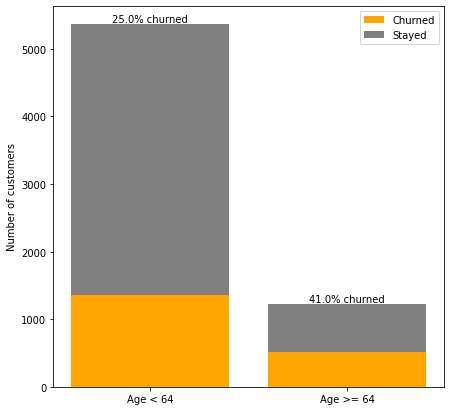

In [66]:
graph_feature_churn_rate_by_class("Senior", [0, 1], ["Age < 64", "Age >= 64"])

Interestingly, senior citizens tend to churn more.

## Number of Dependents, Married_Yes

In [67]:
df_eda[df_eda["Married_Yes"] == 1]["Number of Dependents"].describe()

count    3318.000000
mean        0.786317
std         1.142737
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max         9.000000
Name: Number of Dependents, dtype: float64

In [68]:
df_eda[df_eda["Married_Yes"] == 0]["Number of Dependents"].describe()

count    3271.000000
mean        0.161419
std         0.606986
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.000000
Name: Number of Dependents, dtype: float64

In [69]:
df_eda[["Married_Yes", "Number of Dependents"]].corr()

Married_Yes  Number of Dependents
Married_Yes              1.000000              0.322628
Number of Dependents     0.322628              1.000000

In [70]:
df_eda[["Married_Yes", "Customer Status_Churned"]].corr()

Married_Yes  Customer Status_Churned
Married_Yes                 1.000000                -0.183273
Customer Status_Churned    -0.183273                 1.000000

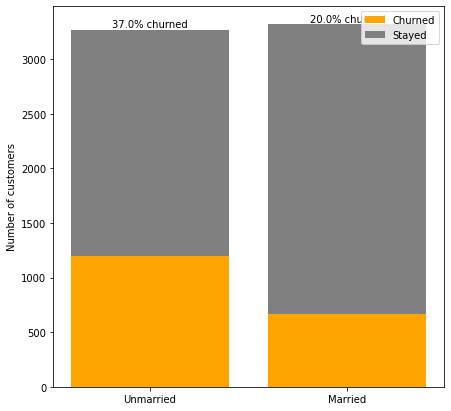

In [71]:
graph_feature_churn_rate_by_class("Married_Yes", [0, 1], ["Unmarried", "Married"])

There is a nearly equal amount of married and unmarried customers.

Unmarried individuals seem to churn more than married individuals. This may be because married individuals have to make sure that their partner is also willing to discontinue using the service, while unmarried individuals can simply decide on their own.

## Number of Referrals

In [72]:
graph_distribution("Number of Referrals")

In [73]:
# About half of the customers seem to have given no referrals
# Let's group the customers into two groups: those who have given no referrals and those who have given at least one referral

df_eda["Given_Referral"] = (df_eda["Number of Referrals"] > 0).astype(int)

In [74]:
df_eda["Given_Referral"].value_counts()

0    3448
1    3141
Name: Given_Referral, dtype: int64

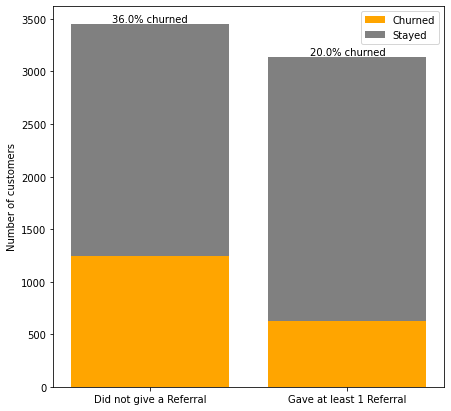

In [75]:
graph_feature_churn_rate_by_class("Given_Referral", [0, 1], ["Did not give a Referral", "Gave at least 1 Referral"])

As we can see, those who did not gave any referrals churned almost twice as much as those who gave at least one referral.

This makes sense as those who suggest the product/service (in this case telecom service) to others are more likely to prefer using the service and therefore not churn.

## Tenure in Months

In [76]:
graph_distribution("Tenure in Months")
df_eda["Tenure in Months"].describe()

count    6589.000000
mean       34.499772
std        23.968734
min         1.000000
25%        12.000000
50%        32.000000
75%        57.000000
max        72.000000
Name: Tenure in Months, dtype: float64

By analysing the histogram, there seems to be three main parts to the distribution:


1.   ``0 < Tenure in Months < 12``
2.   ``12 < Tenure in Months < 70``
3.   ``70 < Tenure in Months``



In [77]:
# Let's create a column that divides up the dataset based on these three sections

def classify_tenure_in_months(tenure):
  if tenure >= 0 and tenure <= 12:
    return 0
  elif tenure > 12 and tenure < 70:
    return 1
  return 2

df_eda["Tenure_Class"] = df_eda["Tenure in Months"].apply(classify_tenure_in_months)
df_eda["Tenure_Class"].value_counts().sort_index()

0    1732
1    4206
2     651
Name: Tenure_Class, dtype: int64

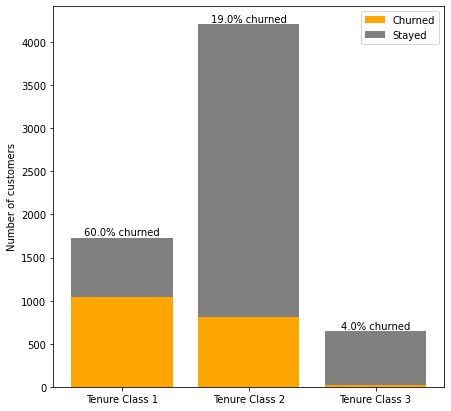

In [78]:
graph_feature_churn_rate_by_class("Tenure_Class", [0, 1, 2], ["Tenure Class 1", "Tenure Class 2", "Tenure Class 3"])

This graph gives us an interesting insight into the churn patterns of these different tenure groups:

- Tenure Class 1 (``0 < Tenure in Months < 12``): 60% of customers who were using the service for less than 12 months churned. This is a strong indicator that people the majority of people dislike the service and discontinue its use within the first year.
- Tenure Class 2 (``12 < Tenure in Months < 70``): Only 19% of customers who have been using the service for more than 12 months but less than 70, churned. Most customers are at this stage are comfortable with the service, however some may dislike it and therefore discountined it use.
- Tenure Class 3 (``70 < Tenure in Months``): Only 4% of customers who have been using the service for more than 70 months (around 3 years) churned. Customers who have been using the service for this long are happy with it, with the vast majority not churning.

This could be a very important indicator of churn. As the the Tenure in Months increases, the churn percentage per class decreases.

Out of curiosity, let's see the correlation between ``Number of Referrals`` and ``Tenure in Months``. I would expect the number of referrals to increase as the customers keeps using the product (i.e. as ``Tenure in Months`` increases).

In [79]:
df_eda[["Tenure in Months", "Number of Referrals"]].corr()

Tenure in Months  Number of Referrals
Tenure in Months             1.000000             0.323826
Number of Referrals          0.323826             1.000000

In [80]:
df_eda = pd.concat([df_eda, pd.get_dummies(df_eda["Tenure_Class"], prefix="Tenure_Class")], axis=1)
df_eda.drop(columns="Tenure_Class", inplace=True)

It seems to be that they are slightly correlated, but not too much. This is probably due to the fact that most customers (recall that almost 50% of customers do not give referrals) simply do not give referrals.

## Monthly Charge, Total Charges, Total Refunds, Total Extra Data Charges, Total Long Distance Charges, Total Revenue

In [81]:
cols = ['Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
        'Total Revenue', "Customer Status_Churned"]

In [82]:
df_eda[cols].corr()

Monthly Charge  Total Charges  Total Refunds  \
Monthly Charge                     1.000000       0.619024       0.012562   
Total Charges                      0.619024       1.000000       0.025836   
Total Refunds                      0.012562       0.025836       1.000000   
Total Extra Data Charges           0.114726       0.114258       0.014381   
Total Long Distance Charges        0.209095       0.587375       0.016002   
Total Revenue                      0.554815       0.970266       0.022574   
Customer Status_Churned            0.168290      -0.250071      -0.043525   

                             Total Extra Data Charges  \
Monthly Charge                               0.114726   
Total Charges                                0.114258   
Total Refunds                                0.014381   
Total Extra Data Charges                     1.000000   
Total Long Distance Charges                  0.050016   
Total Revenue                                0.114636   
Customer Status_Churned                     -0.000259   

                             Total Long Distance Charges  Total Revenue  \
Monthly Charge                                  0.209095       0.554815   
Total Charges                                   0.587375       0.970266   
Total Refunds                                   0.016002       0.022574   
Total Extra Data Charges                        0.050016       0.114636   
Total Long Distance Charges                     1.000000       0.765651   
Total Revenue                                   0.765651       1.000000   
Customer Status_Churned                        -0.268430      -0.278626   

                             Customer Status_Churned  
Monthly Charge                              0.168290  
Total Charges                              -0.250071  
Total Refunds                              -0.043525  
Total Extra Data Charges                   -0.000259  
Total Long Distance Charges                -0.268430  
Total Revenue                              -0.278626  
Customer Status_Churned                     1.000000

In [83]:
for col in cols:
  graph_distribution(col)

In [84]:
df_eda.iloc[0, :]

Age                                     37.000000
Number of Dependents                     0.000000
Zip Code                             93225.000000
Latitude                                34.827662
Longitude                             -118.999073
Number of Referrals                      2.000000
Tenure in Months                         9.000000
Avg Monthly Long Distance Charges       42.390000
Avg Monthly GB Download                 16.000000
Monthly Charge                          65.600000
Total Charges                          593.300000
Total Refunds                            0.000000
Total Extra Data Charges                 0.000000
Total Long Distance Charges            381.510000
Total Revenue                          974.810000
Population                            4498.000000
Gender_Male                              0.000000
Married_Yes                              1.000000
Offer_None                               1.000000
Offer_Offer A                            0.000000


I have observed that ``Monthly Charges`` = ``Total Charges`` / ``Tenure in Months``. This doesn't really give us any new information, so I think it is safe to drop this column (Monthly Charges).

In [85]:
df_eda.drop(columns="Monthly Charge", inplace=True)

Additionally, since ``Total Extra Data Charges`` is essentially uncorrelated to the target variable, I will group it with ``Total Long Distance Charges`` to form a new column, ``Total Extra Charges``.

In [86]:
df_eda["Total Extra Charges"] = df_eda["Total Extra Data Charges"] + df_eda["Total Long Distance Charges"]
df_eda.drop(columns=["Total Extra Data Charges", "Total Long Distance Charges"], inplace=True)

Now we have...

In [87]:
cols = ["Total Charges", "Total Refunds", "Total Revenue", "Total Extra Charges", "Customer Status_Churned"]

In [88]:
df_eda[cols].corr()

Total Charges  Total Refunds  Total Revenue  \
Total Charges                 1.000000       0.025836       0.970266   
Total Refunds                 0.025836       1.000000       0.022574   
Total Revenue                 0.970266       0.022574       1.000000   
Total Extra Charges           0.589669       0.016405       0.767606   
Customer Status_Churned      -0.250071      -0.043525      -0.278626   

                         Total Extra Charges  Customer Status_Churned  
Total Charges                       0.589669                -0.250071  
Total Refunds                       0.016405                -0.043525  
Total Revenue                       0.767606                -0.278626  
Total Extra Charges                 1.000000                -0.267911  
Customer Status_Churned            -0.267911                 1.000000

Let's explore Total Refunds a little closer. Customers who get refunds often are more probable to dislike the service and therefore churn. Let's see if this hypothesis checks out.

In [89]:
graph_distribution("Total Refunds")

In [90]:
df_eda["Total Refunds"].describe()

count    6589.000000
mean        2.080938
std         8.125054
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        49.790000
Name: Total Refunds, dtype: float64

Most customers do not make any refunds.

In [91]:
# Let's create a column that divides the customers based on if they take refunds or not

df_eda["Takes_Refunds"] = (df_eda["Total Refunds"] > 0).astype(int)

In [92]:
df_eda["Takes_Refunds"].value_counts()

0    6069
1     520
Name: Takes_Refunds, dtype: int64

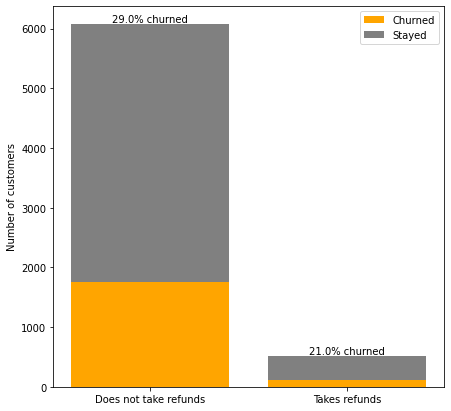

In [93]:
graph_feature_churn_rate_by_class("Takes_Refunds", [0, 1], ["Does not take refunds", "Takes refunds"])

Analysing this graph, we can see that refunds don't really affect churn rate, therefore my above hypothesis was wrong.

Based on this, I think it is safe to drop this column (``Total Refunds``).

In [94]:
df_eda.drop(columns="Total Refunds", inplace=True)

Finally, we are left with these filtered metrics...

In [95]:
cols = ["Total Charges", "Total Revenue", "Total Extra Charges", "Customer Status_Churned"]

In [96]:
df_eda[cols].corr()

Total Charges  Total Revenue  Total Extra Charges  \
Total Charges                 1.000000       0.970266             0.589669   
Total Revenue                 0.970266       1.000000             0.767606   
Total Extra Charges           0.589669       0.767606             1.000000   
Customer Status_Churned      -0.250071      -0.278626            -0.267911   

                         Customer Status_Churned  
Total Charges                          -0.250071  
Total Revenue                          -0.278626  
Total Extra Charges                    -0.267911  
Customer Status_Churned                 1.000000

## Gender_Male

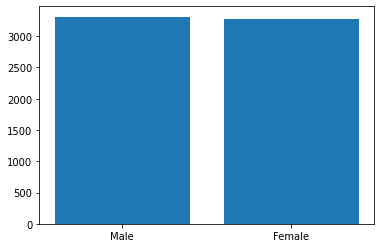

In [97]:
counts = df_eda["Gender_Male"].value_counts()
male_n, female_n = counts[1], counts[0]
plt.bar(["Male", "Female"], [male_n, female_n])
plt.show()

There is an almost equal split between male customers and female customers.

Let's see if gender has any effect on churn rate...

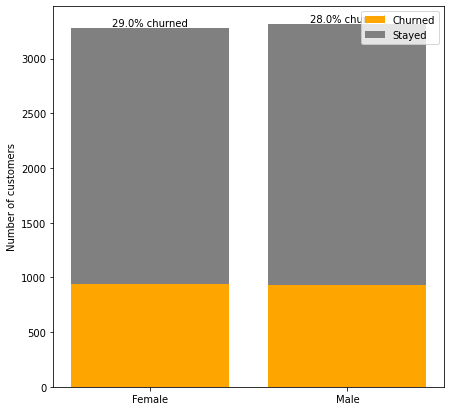

In [98]:
graph_feature_churn_rate_by_class("Gender_Male", [0, 1], ["Female", "Male"])

Analysing this graph, we can see that gender does not have a huge impact on churn rate as the churn rate for both males and females is essentially the same.

Based on this, I think it is safe to drop this column, as it is not a good predictor of churn.

In [99]:
df_eda.drop(columns="Gender_Male", inplace=True)

## Offer_None, Offer_Offer A, Offer_Offer B, Offer_Offer D, Offer_Offer E

In [100]:
get_description_of_field("Offer")

'Identifies the last marketing offer that the customer accepted: None, Offer A, Offer B, Offer C, Offer D, Offer E'

Recall that we deleted ``Offer C`` as to avoid the dummy variable trap. We chose to get rid of ``Offer C`` as it had the least number of customers subscribed to it.

In [101]:
cols = ['Offer_None', 'Offer_Offer A', 'Offer_Offer B', 'Offer_Offer D', 'Offer_Offer E', "Customer Status_Churned"]

In [102]:
df_eda[cols].corr()

Offer_None  Offer_Offer A  Offer_Offer B  \
Offer_None                 1.000000      -0.321045      -0.414654   
Offer_Offer A             -0.321045       1.000000      -0.110664   
Offer_Offer B             -0.414654      -0.110664       1.000000   
Offer_Offer D             -0.347789      -0.092819      -0.119883   
Offer_Offer E             -0.356620      -0.095176      -0.122927   
Customer Status_Churned    0.020565      -0.140487      -0.135100   

                         Offer_Offer D  Offer_Offer E  Customer Status_Churned  
Offer_None                   -0.347789      -0.356620                 0.020565  
Offer_Offer A                -0.092819      -0.095176                -0.140487  
Offer_Offer B                -0.119883      -0.122927                -0.135100  
Offer_Offer D                 1.000000      -0.103104                -0.011405  
Offer_Offer E                -0.103104       1.000000                 0.283144  
Customer Status_Churned      -0.011405       0.283144                 1.000000

```Offer E``` seems to have an unusually high correlation to churn rate compared to the other offers.

In [103]:
x = cols[:-1]
x

['Offer_None',
 'Offer_Offer A',
 'Offer_Offer B',
 'Offer_Offer D',
 'Offer_Offer E']

In [104]:
counts = []

for col in x:
  counts.append(df_eda[col].value_counts()[1])

counts

[3598, 520, 824, 602, 630]

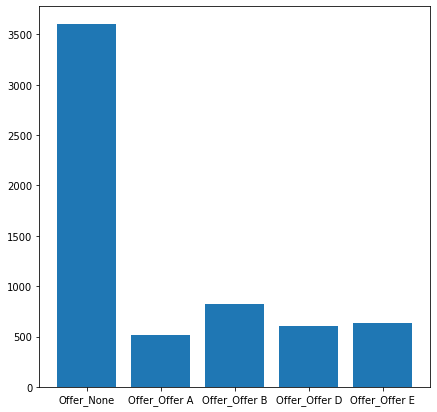

In [105]:
plt.figure(figsize=(7, 7))
plt.bar(x, counts)
plt.show()

Most customers did not accept any offer. Offer B is the most popular offer that was accepted.

In [106]:
churned = []
stayed = []

for j in range(len(x)):
  counts = df_eda[df_eda[x[j]] == 1]["Customer Status_Churned"].value_counts()
  churned.append(counts[1])
  stayed.append(counts[0])

churned, stayed

([1051, 35, 101, 161, 426], [2547, 485, 723, 441, 204])

In [107]:
percent_churned = [f"{round(churned[i] / (churned[i] + stayed[i]) * 100, 0)}% churned" for i in range(len(x))]
percent_churned

['29.0% churned',
 '7.0% churned',
 '12.0% churned',
 '27.0% churned',
 '68.0% churned']

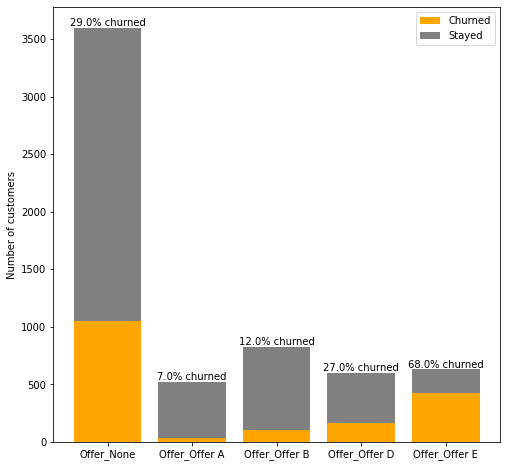

In [108]:
y1 = churned
y2 = stayed
plt.figure(figsize=(8, 8))
bar1 = plt.bar(x, y1, color='orange')
bar2 = plt.bar(x, y2, bottom=y1, color='gray')
plt.bar_label(bar2, percent_churned)
plt.ylabel("Number of customers")
plt.legend(["Churned", "Stayed"])
plt.show()

This graph gives us an interesting insight into the churn rates based on the offers given to customers.

Customers who were offered ```Offer E``` churned around 68% of the time, while those who were offerred ```Offer A``` churned only around 7% of the time.

Let's investigate ```Offer E``` a little more.

In [109]:
df_eda[["Offer_Offer E", "Tenure in Months", "Total Revenue"]].corr()

Offer_Offer E  Tenure in Months  Total Revenue
Offer_Offer E          1.000000         -0.410290      -0.328472
Tenure in Months      -0.410290          1.000000       0.840935
Total Revenue         -0.328472          0.840935       1.000000

```Tenure in Months``` and ``Total Revenue`` seem to be moderately negatively correlated with ```Offer E```.

## Internet Service_Yes

In [110]:
get_description_of_field("Internet Service")

'Indicates if the customer subscribes to Internet service with the company: Yes, No'

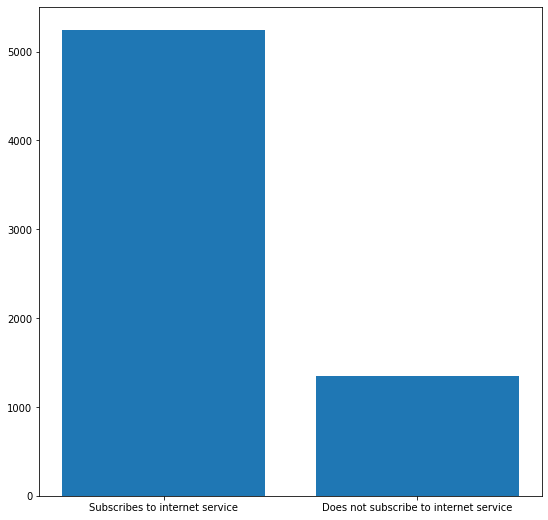

In [111]:
counts = df_eda["Internet Service_Yes"].value_counts()
yes, no = counts[1], counts[0]
plt.figure(figsize=(9, 9))
plt.bar(["Subscribes to internet service", "Does not subscribe to internet service"], [yes, no])
plt.show()

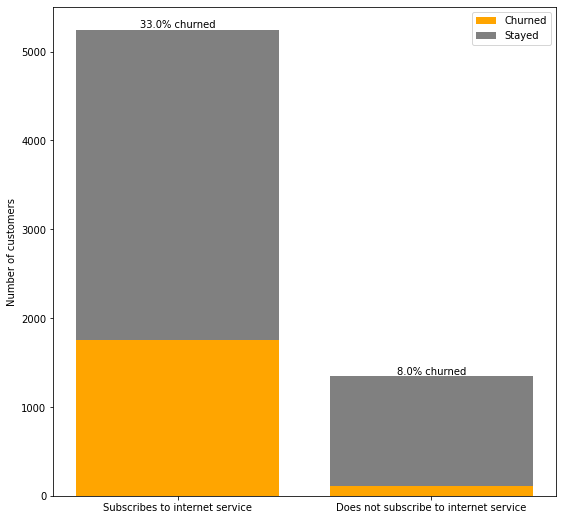

In [112]:
graph_feature_churn_rate_by_class(
    col="Internet Service_Yes",
    classes=[1, 0], 
    classes_desc=["Subscribes to internet service", "Does not subscribe to internet service"],
    figsize=(9, 9)
)

We can observe from this graph that almost a third of customers who subscribe to internet service, churn. Whereas only 8% of customers who do not subscribe to internet service churn.

This may be an indicator that the company's internet service is a major reason why customers are churning.

## Online Security_No

In [113]:
get_description_of_field("Online Security")

'Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No (if the customer is not subscribed to internet service, this will be No)'

In [114]:
df_eda[["Online Security_No", "Internet Service_Yes"]].corr()

Online Security_No  Internet Service_Yes
Online Security_No               1.00000               0.50276
Internet Service_Yes             0.50276               1.00000

There is a positive correlation between ``Online Security_No`` and ``Internet Service_Yes``. This backs up the statement in the description, which says that "if the customer is not subscribed to internet service, [``Online Security_No``] will be No".

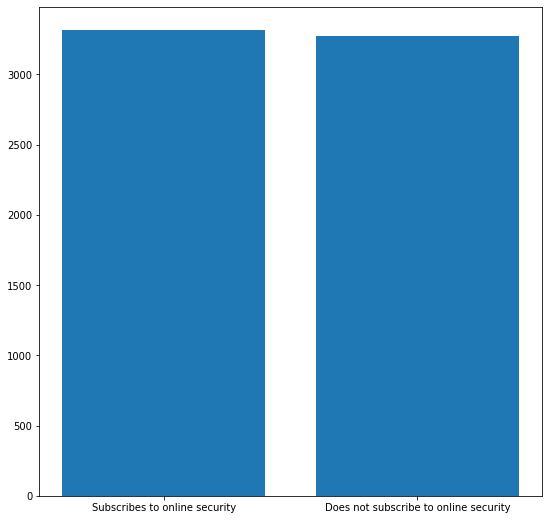

In [115]:
counts = df_eda["Online Security_No"].value_counts()
subscribed, not_subscribed = counts[0], counts[1]
plt.figure(figsize=(9, 9))
plt.bar(["Subscribes to online security", "Does not subscribe to online security"], [subscribed, not_subscribed])
plt.show()

There is almost an even split between those who subscribe to online security and those who don't.

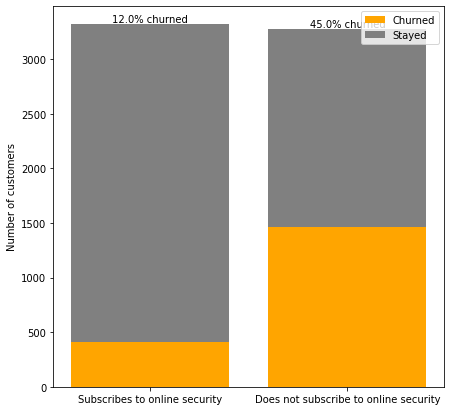

In [116]:
graph_feature_churn_rate_by_class(
    "Online Security_No", 
    [0, 1], 
    ["Subscribes to online security", "Does not subscribe to online security"]
)

Those who don't subscribe to online security churn 4 times as much as those who do.

In [117]:
df_eda[["Internet Service_Yes", "Online Security_No", "Customer Status_Churned"]].corr()

Internet Service_Yes  Online Security_No  \
Internet Service_Yes                 1.000000            0.502760   
Online Security_No                   0.502760            1.000000   
Customer Status_Churned              0.224121            0.358836   

                         Customer Status_Churned  
Internet Service_Yes                    0.224121  
Online Security_No                      0.358836  
Customer Status_Churned                 1.000000

## Online Backup_No

In [118]:
get_description_of_field("Online Backup")

'Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No (if the customer is not subscribed to internet service, this will be No)'

In [119]:
df_eda[["Online Backup_No", "Internet Service_Yes"]].corr()

Online Backup_No  Internet Service_Yes
Online Backup_No              1.000000              0.444687
Internet Service_Yes          0.444687              1.000000

Similar to ``Online Security_No``, ``Online Backup_No`` has a positive correlation with ``Internet Service_Yes``.

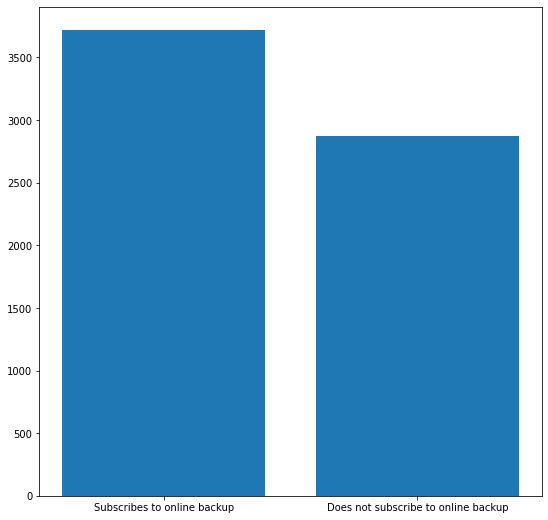

In [120]:
counts = df_eda["Online Backup_No"].value_counts()
subscribed, not_subscribed = counts[0], counts[1]
plt.figure(figsize=(9, 9))
plt.bar(["Subscribes to online backup", "Does not subscribe to online backup"], [subscribed, not_subscribed])
plt.show()

Interestingly, a larger portion of customers subscribe to online backup. This may be an indicator that customers generally like the backup service provided by the company.

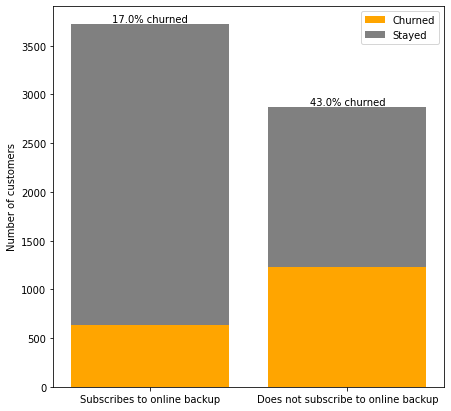

In [121]:
graph_feature_churn_rate_by_class(
    "Online Backup_No", 
    [0, 1], 
    ["Subscribes to online backup", "Does not subscribe to online backup"]
)

Similar to online security, customers who do not subscribe to online backup are more likely to churn.

In [122]:
df_eda[["Internet Service_Yes", "Online Security_No", "Online Backup_No", "Customer Status_Churned"]].corr()

Internet Service_Yes  Online Security_No  \
Internet Service_Yes                 1.000000            0.502760   
Online Security_No                   0.502760            1.000000   
Online Backup_No                     0.444687            0.359233   
Customer Status_Churned              0.224121            0.358836   

                         Online Backup_No  Customer Status_Churned  
Internet Service_Yes             0.444687                 0.224121  
Online Security_No               0.359233                 0.358836  
Online Backup_No                 1.000000                 0.284454  
Customer Status_Churned          0.284454                 1.000000

## Device Protection Plan_No

In [123]:
get_description_of_field("Device Protection Plan")

'Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No (if the customer is not subscribed to internet service, this will be No)'

In [124]:
df_eda[["Device Protection Plan_No", "Internet Service_Yes"]].corr()

Device Protection Plan_No  Internet Service_Yes
Device Protection Plan_No                   1.000000              0.442632
Internet Service_Yes                        0.442632              1.000000

``Device Protection Plan_No`` also has a positive correlation with ``Internet Service_Yes``, for the same reasons as ``Online Security_No`` and ``Online Backup_No``.

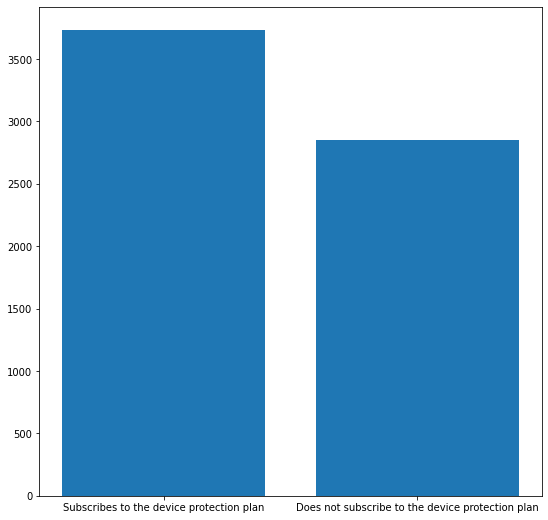

In [125]:
counts = df_eda["Device Protection Plan_No"].value_counts()
subscribed, not_subscribed = counts[0], counts[1]
plt.figure(figsize=(9, 9))
plt.bar(["Subscribes to the device protection plan", "Does not subscribe to the device protection plan"], [subscribed, not_subscribed])
plt.show()

The majority of customers subscribe to the device protection plan.

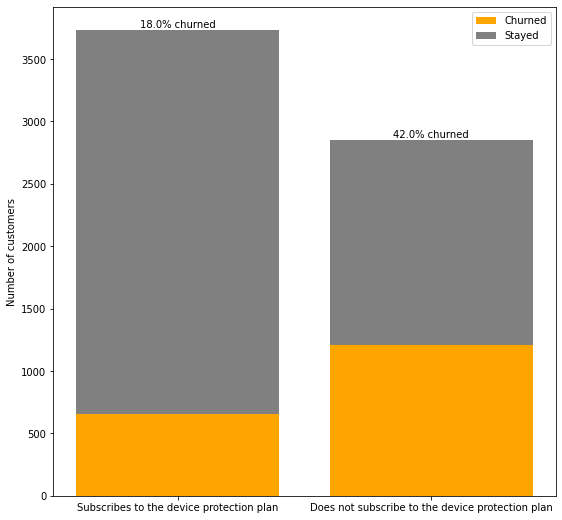

In [126]:
graph_feature_churn_rate_by_class(
    col="Device Protection Plan_No", 
    classes=[0, 1], 
    classes_desc=["Subscribes to the device protection plan", "Does not subscribe to the device protection plan"],
    figsize=(9, 9)
)

Customers who do not subscribe to the device protection plan are more likely to churn.

In [127]:
df_eda[["Internet Service_Yes", "Online Security_No", "Online Backup_No", "Device Protection Plan_No", "Customer Status_Churned"]].corr()

Internet Service_Yes  Online Security_No  \
Internet Service_Yes                   1.000000            0.502760   
Online Security_No                     0.502760            1.000000   
Online Backup_No                       0.444687            0.359233   
Device Protection Plan_No              0.442632            0.348700   
Customer Status_Churned                0.224121            0.358836   

                           Online Backup_No  Device Protection Plan_No  \
Internet Service_Yes               0.444687                   0.442632   
Online Security_No                 0.359233                   0.348700   
Online Backup_No                   1.000000                   0.340002   
Device Protection Plan_No          0.340002                   1.000000   
Customer Status_Churned            0.284454                   0.272570   

                           Customer Status_Churned  
Internet Service_Yes                      0.224121  
Online Security_No                        0.358836  
Online Backup_No                          0.284454  
Device Protection Plan_No                 0.272570  
Customer Status_Churned                   1.000000

## Premium Tech Support_No, Streaming TV_Yes, Streaming Movies_Yes, Streaming Music_No, Unlimited Data_Yes

The last few columns have had a similarity. They will always be "No" if ``Internet Service_Yes`` is "No". 

If the customer is not subscribed to internet service, then the customer will also not be subscribed to online security, online backup, device protection plan, premium tech support, streaming and unlimited data.

This is why I have grouped these last few features together.

In [128]:
features = ["Premium Tech Support", "TV Streaming", "Movie Streaming", "Music Streaming", "Unlimited Data"]
cols = ["Premium Tech Support_No", "Streaming TV_Yes", "Streaming Movies_Yes", "Streaming Music_No", "Unlimited Data_Yes"]

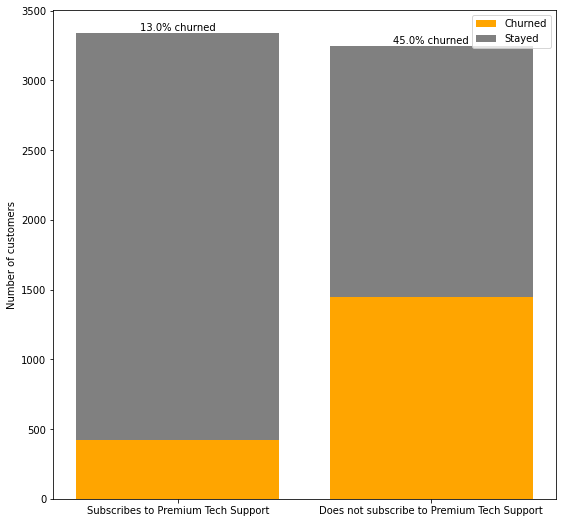

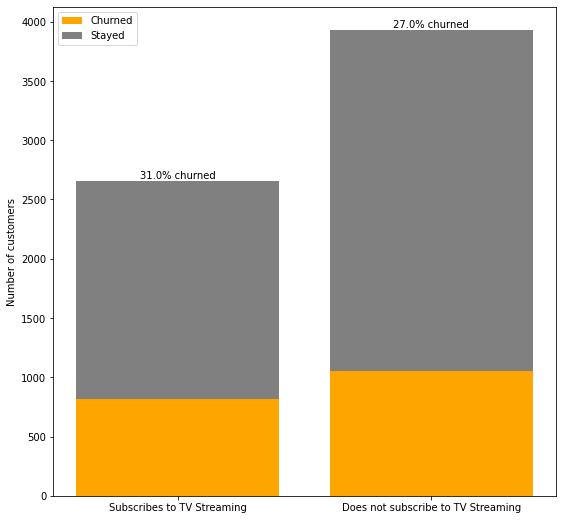

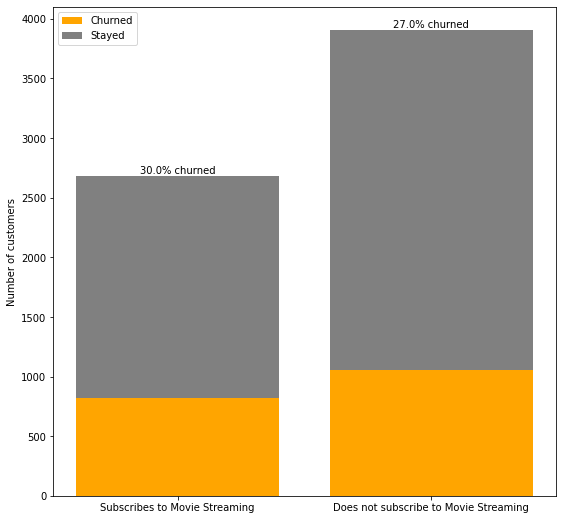

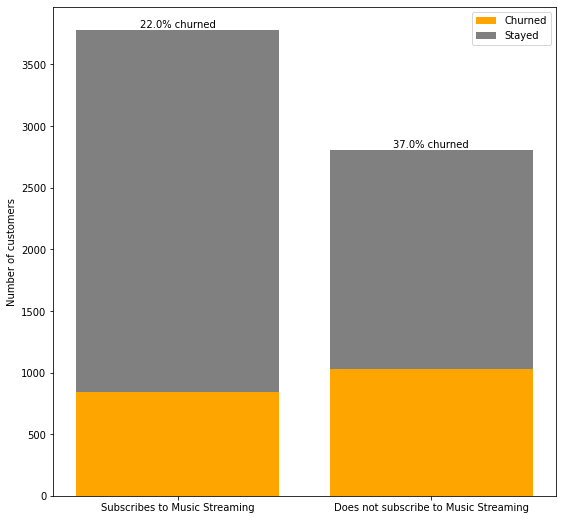

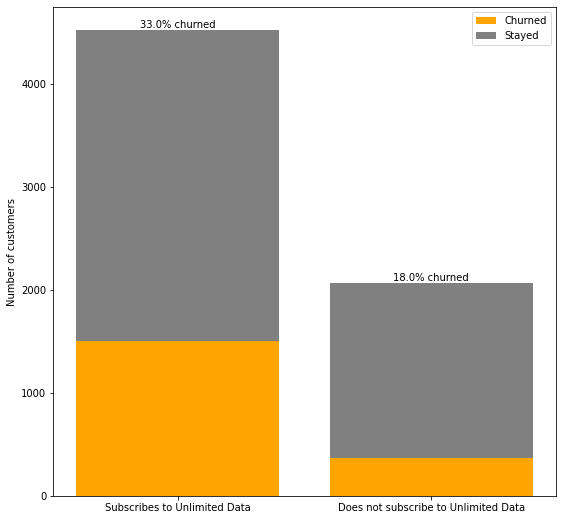

In [129]:
for i in range(len(features)):
  col = cols[i]
  feature = features[i]
  classes_desc = ["Subscribes to "+feature, "Does not subscribe to "+feature]
  figsize=(9, 9)

  if col.endswith("No"):
    graph_feature_churn_rate_by_class(
      col=col, 
      classes=[0, 1], 
      classes_desc=classes_desc,
      figsize=figsize
    )
  elif col.endswith("Yes"):
    graph_feature_churn_rate_by_class(
      col=col, 
      classes=[1, 0], 
      classes_desc=classes_desc,
      figsize=figsize
    )

From these graphs we gather some important insights:
- There is an almost equal split between customers who are subscribed to **premium tech support** and those who don't. However customers who are not subscribed to this service are 3 times more likely to churn.
- The majority of customers are not subscribed to **TV streaming**. However, interestingly, customers who use TV streaming have a slightly higher churn rate than those who don't.
- Similar to TV Streaming, the majority of customers are not subscribed to **movie streaming**. Further, customers who use movie streaming have a slightly higher churn rate than those who don't.
- The majority of customers are subscribed to **music streaming**. The churn rate is higher for those who are not subscribed to music streaming.
- The majority of customers are subscribed to **unlimited data**. The churn rate is higher for customers who are subscribed to this service.

Conclusions:
- Customers who use the premium tech support service or music streaming service have lower churn rates than those who are not.
- Customers who use the TV streaming service, movie streaming service or unlimited data service have higher churn rates that those who do not. 

From the above data as well as the previous sections, we have come up with this division:

1. Services that produce comparably high churn rates:
- TV Streaming
- Movie Streaming
- Unlimited Data

2. Services that produce comparably low churn rates:
- Online Security
- Online Backup
- Device Protection Plan
- Premium Tech Support
- Music Streaming

Let's create two new features that utilises this division. 

``Uses_High_Churn_Services``: If the customer is subscribed to all of the high churn rate services, then this will be 1. Otherwise, it will be 0.

``Uses_Low_Churn_Services``: If the customer is subscribed to at least three of the low churn rate services, then this will be 1. Otherwise it will be 0.

In [130]:
high_churn_cols = ["Streaming TV_Yes", "Streaming Movies_Yes", "Unlimited Data_Yes"]

df_eda["Uses_High_Churn_Services"] = (df_eda[high_churn_cols].sum(axis=1) >= 2 ).astype(int)

In [131]:
low_churn_cols = ["Online Security_No", "Online Backup_No", "Device Protection Plan_No", "Premium Tech Support_No", "Streaming Music_No"]

""" 
We subract the sum from 5 as the sum by itself would give us the number of 
services that the customer is not subscribed to (this is because the above
columns end with "No"). By subtracting 5, we will get the number of services
that the customer is subscribed to.
"""

df_eda["Uses_Low_Churn_Services"] = ((5 - df_eda[low_churn_cols].sum(axis=1)) >= 3).astype(int)

In [132]:
df_eda.head()

Age  Number of Dependents  Zip Code   Latitude   Longitude  \
0   37                     0     93225  34.827662 -118.999073   
1   46                     0     91206  34.162515 -118.203869   
2   50                     0     92627  33.645672 -117.922613   
3   78                     0     94553  38.014457 -122.115432   
4   75                     0     93010  34.227846 -119.079903   

   Number of Referrals  Tenure in Months  Avg Monthly Long Distance Charges  \
0                    2                 9                              42.39   
1                    0                 9                              10.69   
2                    0                 4                              33.65   
3                    1                13                              27.82   
4                    3                 3                               7.38   

   Avg Monthly GB Download  Total Charges  ...  Customer Status_Churned  \
0                     16.0         593.30  ...                        0   
1                     10.0         542.40  ...                        0   
2                     30.0         280.85  ...                        1   
3                      4.0        1237.85  ...                        1   
4                     11.0         267.40  ...                        1   

   Senior  Given_Referral  Tenure_Class_0  Tenure_Class_1  Tenure_Class_2  \
0       0               1               1               0               0   
1       0               0               1               0               0   
2       0               0               1               0               0   
3       1               1               0               1               0   
4       1               1               1               0               0   

   Total Extra Charges  Takes_Refunds  Uses_High_Churn_Services  \
0               381.51              0                         1   
1               106.21              1                         0   
2               134.60              0                         0   
3               361.66              0                         1   
4                22.14              0                         1   

   Uses_Low_Churn_Services  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  

[5 rows x 46 columns]

In [133]:
df_eda[["Uses_High_Churn_Services", "Uses_Low_Churn_Services", "Customer Status_Churned"]].corr()

Uses_High_Churn_Services  Uses_Low_Churn_Services  \
Uses_High_Churn_Services                  1.000000                 0.006934   
Uses_Low_Churn_Services                   0.006934                 1.000000   
Customer Status_Churned                   0.047084                -0.372058   

                          Customer Status_Churned  
Uses_High_Churn_Services                 0.047084  
Uses_Low_Churn_Services                 -0.372058  
Customer Status_Churned                  1.000000

``Uses_Low_Churn_Services`` is moderately negatively correlated to churn. This makes sense as the more low churn services a customers uses, the more likely they are not to churn.

``Uses_High_Churn_Services`` is essentially not correlated to churn rate at all. However, correlation is not the only factor that affects whether a feature is a good predictor of the target variable, so we will keep this feature in the dataset.

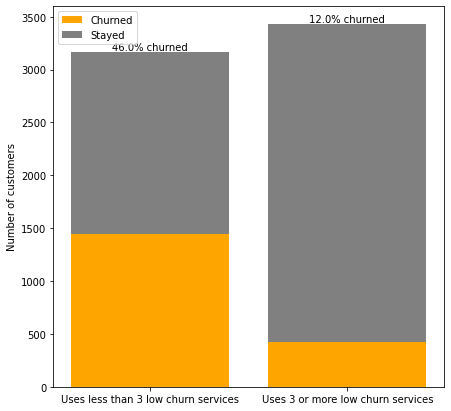

In [134]:
graph_feature_churn_rate_by_class(
    "Uses_Low_Churn_Services", 
    [0, 1], 
    ["Uses less than 3 low churn services", "Uses 3 or more low churn services"]
)

As expected, the churn rate is much lower (almost 4 times lower) for customers who use a comparatively large number of low churn services.

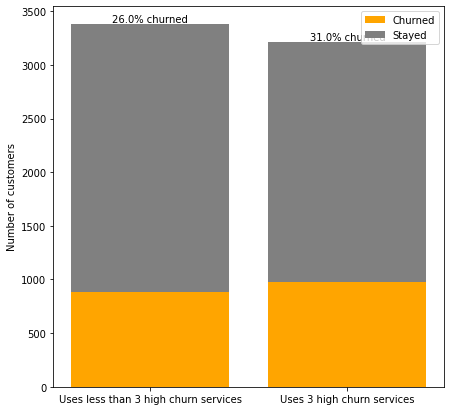

In [135]:
graph_feature_churn_rate_by_class(
    "Uses_High_Churn_Services", 
    [0, 1], 
    ["Uses less than 3 high churn services", "Uses 3 high churn services"]
)

Dissapointingly, this feature does not provide a significant gap between churn rates.

## Paperless Billing_Yes

In [136]:
get_description_of_field("Paperless Billing")

'Indicates if the customer has chosen paperless billing: Yes, No'

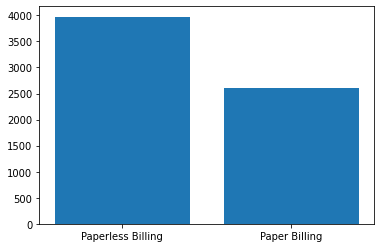

In [137]:
counts = df_eda["Paperless Billing_Yes"].value_counts()
paperless, non_paperless = counts[1], counts[0]
plt.bar(["Paperless Billing", "Paper Billing"], [paperless, non_paperless])
plt.show()

Most customers opt for paperless billing.

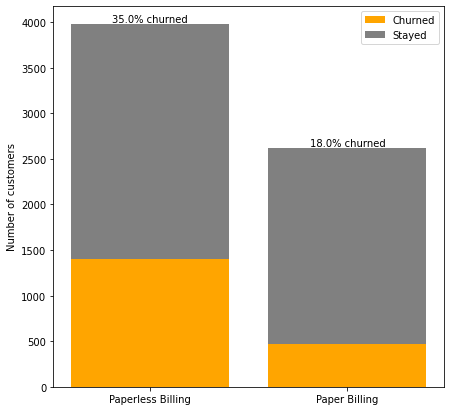

In [138]:
graph_feature_churn_rate_by_class("Paperless Billing_Yes", [1, 0], ["Paperless Billing", "Paper Billing"])

Customers who opt for paperless billing are almost twice as likely to churn than those who don't.

In [139]:
df_eda[["Paperless Billing_Yes", "Customer Status_Churned"]].corr()

Paperless Billing_Yes  Customer Status_Churned
Paperless Billing_Yes                 1.000000                 0.187702
Customer Status_Churned               0.187702                 1.000000

In [140]:
df_eda[["Paperless Billing_Yes", "Internet Service_Yes"]].corr()

Paperless Billing_Yes  Internet Service_Yes
Paperless Billing_Yes               1.000000              0.318405
Internet Service_Yes                0.318405              1.000000

## Contract_Month-to-Month, Contract_Two Year

In [141]:
get_description_of_field("Contract")

'Indicates the customer\x92s current contract type: Month-to-Month, One Year, Two Year'

In [142]:
cols = ["Contract_Month-to-Month", "Contract_Two Year", "Customer Status_Churned"]

In [143]:
df_eda[cols].corr()

Contract_Month-to-Month  Contract_Two Year  \
Contract_Month-to-Month                 1.000000          -0.610011   
Contract_Two Year                      -0.610011           1.000000   
Customer Status_Churned                 0.503030          -0.358894   

                         Customer Status_Churned  
Contract_Month-to-Month                 0.503030  
Contract_Two Year                      -0.358894  
Customer Status_Churned                 1.000000

In [144]:
x = cols[:-1]
x

['Contract_Month-to-Month', 'Contract_Two Year']

In [145]:
counts = []

for col in x:
  counts.append(df_eda[col].value_counts()[1])

counts

[3202, 1861]

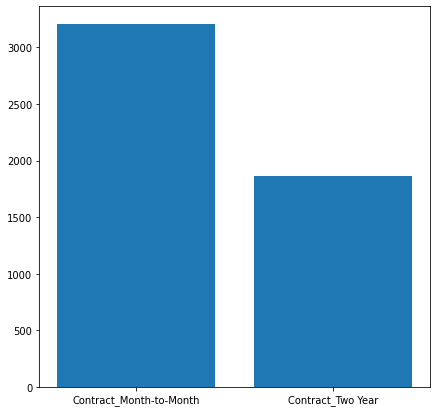

In [146]:
plt.figure(figsize=(7, 7))
plt.bar(x, counts)
plt.show()

Most customers opt for the monthly plan.

In [147]:
churned = []
stayed = []

for j in range(len(x)):
  counts = df_eda[df_eda[x[j]] == 1]["Customer Status_Churned"].value_counts()
  churned.append(counts[1])
  stayed.append(counts[0])

churned, stayed

([1655, 48], [1547, 1813])

In [148]:
percent_churned = [f"{round(churned[i] / (churned[i] + stayed[i]) * 100, 0)}% churned" for i in range(len(x))]
percent_churned

['52.0% churned', '3.0% churned']

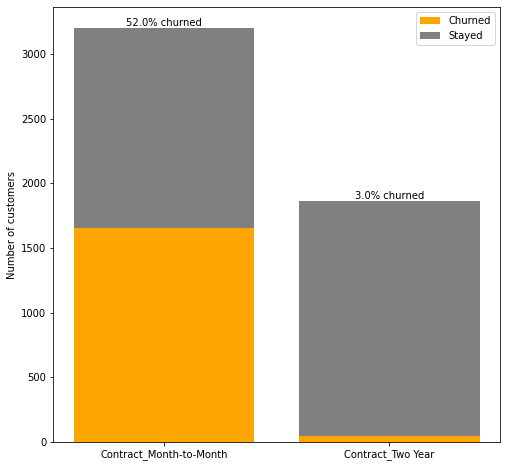

In [149]:
y1 = churned
y2 = stayed
plt.figure(figsize=(8, 8))
bar1 = plt.bar(x, y1, color='orange')
bar2 = plt.bar(x, y2, bottom=y1, color='gray')
plt.bar_label(bar2, percent_churned)
plt.ylabel("Number of customers")
plt.legend(["Churned", "Stayed"])
plt.show()

An astonishing 52% of customers who opt for the monthly plan, churn. Whereas only 3% of customers who use the two-year plan, churn.

## Payment Method_Bank Withdrawal, Payment Method_Credit Card

In [150]:
get_description_of_field("Payment Method")

'Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check'

In [151]:
cols = ["Payment Method_Bank Withdrawal", "Payment Method_Credit Card", "Customer Status_Churned"]

In [152]:
df_eda[cols].corr()

Payment Method_Bank Withdrawal  \
Payment Method_Bank Withdrawal                        1.000000   
Payment Method_Credit Card                           -0.897752   
Customer Status_Churned                               0.184448   

                                Payment Method_Credit Card  \
Payment Method_Bank Withdrawal                   -0.897752   
Payment Method_Credit Card                        1.000000   
Customer Status_Churned                          -0.219122   

                                Customer Status_Churned  
Payment Method_Bank Withdrawal                 0.184448  
Payment Method_Credit Card                    -0.219122  
Customer Status_Churned                        1.000000

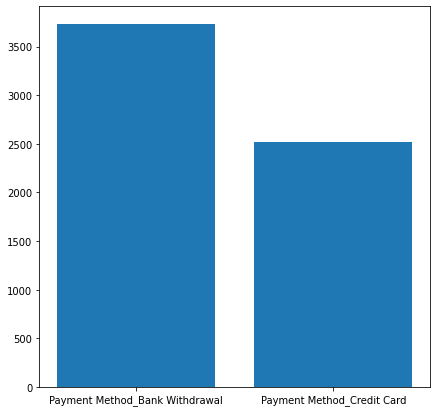

In [153]:
x = cols[:-1]

counts = []

for col in x:
  counts.append(df_eda[col].value_counts()[1])

plt.figure(figsize=(7, 7))
plt.bar(x, counts)
plt.show()

Most customers opt for bank withdrawal to make their payments.

In [154]:
churned = []
stayed = []

for j in range(len(x)):
  counts = df_eda[df_eda[x[j]] == 1]["Customer Status_Churned"].value_counts()
  churned.append(counts[1])
  stayed.append(counts[0])

churned, stayed

([1329, 398], [2399, 2120])

In [155]:
percent_churned = [f"{round(churned[i] / (churned[i] + stayed[i]) * 100, 0)}% churned" for i in range(len(x))]
percent_churned

['36.0% churned', '16.0% churned']

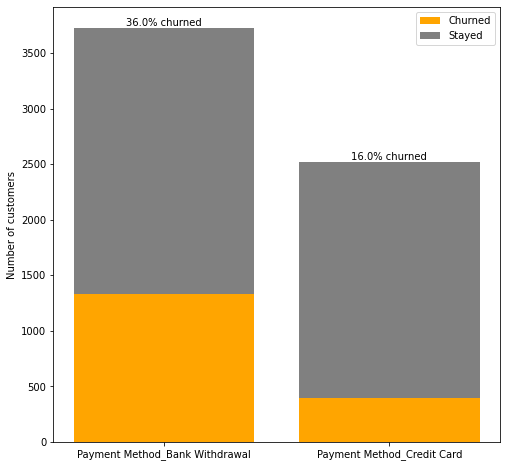

In [156]:
y1 = churned
y2 = stayed
plt.figure(figsize=(8, 8))
bar1 = plt.bar(x, y1, color='orange')
bar2 = plt.bar(x, y2, bottom=y1, color='gray')
plt.bar_label(bar2, percent_churned)
plt.ylabel("Number of customers")
plt.legend(["Churned", "Stayed"])
plt.show()

The churn rate for customers who use bank withdrawal is almost 3 times higher than those who use credit cards.

# Feature engineering

## Clustering Latitude and Longitude

In [157]:
# plotting longitude and latitude
X_train_long_lat = X_train[["Longitude", "Latitude"]]
px.scatter(X_train_long_lat, "Longitude", "Latitude", title="Map of California based on Transaction instances")

In [158]:
# clustering latitude and longitude
kmeans = KMeans(n_clusters=8, n_init="auto")
kmeans.fit(X_train_long_lat)
kmeans.labels_

array([4, 1, 3, ..., 5, 6, 0], dtype=int32)

In [159]:
# plotting latitude and longitude with clusters
px.scatter(
    X_train_long_lat, 
    "Longitude",
    "Latitude", 
    color=kmeans.labels_, 
    title="Map of California based on Transaction instances"
)

In [160]:
# one hot encoding cluster labels

X_train_long_lat_encoded =pd.get_dummies(kmeans.labels_)
X_train_long_lat_encoded

0  1  2  3  4  5  6  7
0     0  0  0  0  1  0  0  0
1     0  1  0  0  0  0  0  0
2     0  0  0  1  0  0  0  0
3     0  0  0  0  0  1  0  0
4     0  0  0  0  0  0  0  1
...  .. .. .. .. .. .. .. ..
5266  0  0  1  0  0  0  0  0
5267  0  0  0  0  0  0  0  1
5268  0  0  0  0  0  1  0  0
5269  0  0  0  0  0  0  1  0
5270  1  0  0  0  0  0  0  0

[5271 rows x 8 columns]

In [161]:
# applying clustering to test dataset
X_test_long_lat = X_test[["Longitude", "Latitude"]]
X_test_long_lat_encoded = pd.get_dummies(kmeans.predict(X_test_long_lat))
X_test_long_lat_encoded

0  1  2  3  4  5  6  7
0     0  0  0  0  1  0  0  0
1     0  0  1  0  0  0  0  0
2     1  0  0  0  0  0  0  0
3     0  0  1  0  0  0  0  0
4     0  0  0  1  0  0  0  0
...  .. .. .. .. .. .. .. ..
1313  0  0  0  0  0  1  0  0
1314  1  0  0  0  0  0  0  0
1315  0  0  0  0  0  0  0  1
1316  0  1  0  0  0  0  0  0
1317  0  0  0  0  0  0  1  0

[1318 rows x 8 columns]

In [162]:
# training model on clustered longitude and latitude

long_lat_clustered_model = scale_classifier_pipeline.fit(X_train_long_lat_encoded, y_train)
y_pred = long_lat_clustered_model.predict(X_test_long_lat_encoded)
accuracy_score(y_test, y_pred)

0.7223065250379362

In [163]:
# training model on original longitude and latitude

long_lat_model = scale_classifier_pipeline.fit(X_train_long_lat, y_train)
y_pred = long_lat_model.predict(X_test_long_lat)
accuracy_score(y_test, y_pred)

0.6699544764795144

**Clustering Latitude and Longitude improves model accuracy.**

In [164]:
# applying clustering to entire dataset
X_long_lat = X[["Longitude", "Latitude"]]
X_long_lat_encoded = pd.get_dummies(kmeans.predict(X_long_lat))
X_long_lat_encoded.shape

(6589, 8)

## Applying PCA to various metrics

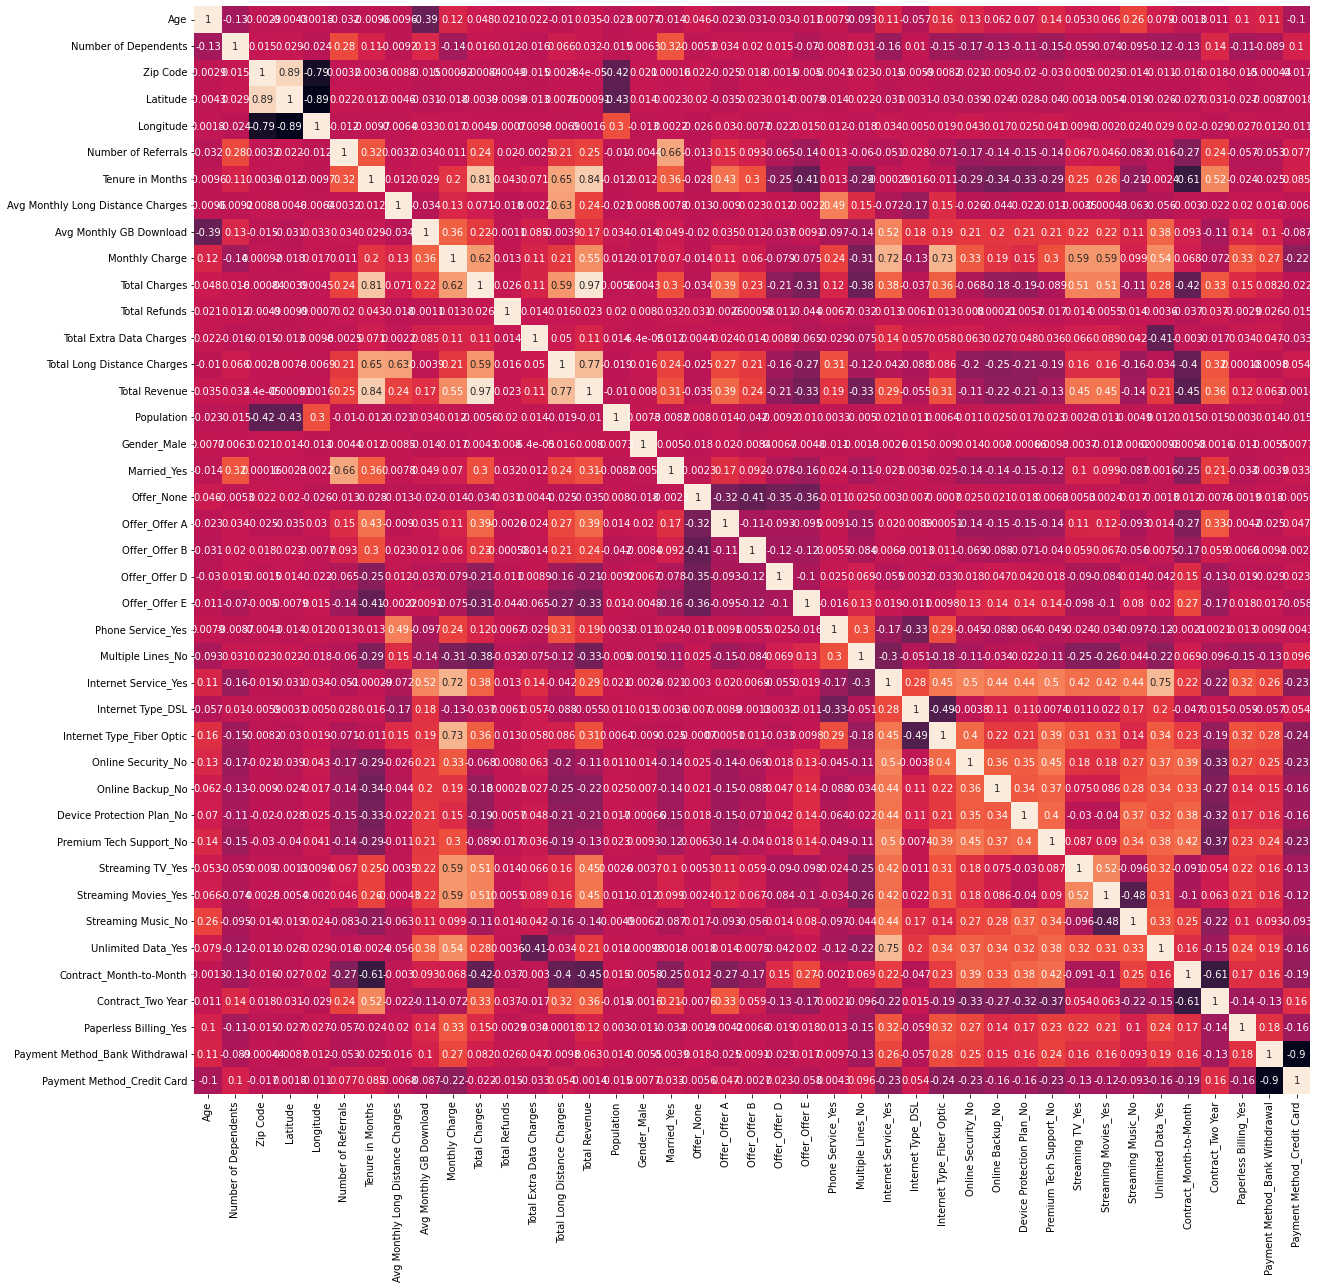

In [165]:
# correlation matrix

plt.figure(figsize=(20, 20))
sns.heatmap(X.corr(), annot=True, cbar=False)
plt.show()

### Trial 1

In [166]:
corr_cols = ["Internet Service_Yes", "Monthly Charge", "Unlimited Data_Yes"]
X[corr_cols].corr()

Internet Service_Yes  Monthly Charge  Unlimited Data_Yes
Internet Service_Yes              1.000000        0.721391            0.748460
Monthly Charge                    0.721391        1.000000            0.543927
Unlimited Data_Yes                0.748460        0.543927            1.000000

In [167]:
X_train_metrics_t1 = X_train[corr_cols]
X_train_metrics_t1

Internet Service_Yes  Monthly Charge  Unlimited Data_Yes
0                        1           40.75                   0
1                        0           19.80                   0
2                        1           80.20                   1
3                        0           20.45                   0
4                        1           74.55                   1
...                    ...             ...                 ...
5266                     0           20.55                   0
5267                     1          108.55                   1
5268                     1          105.00                   1
5269                     1          106.50                   1
5270                     1           75.30                   1

[5271 rows x 3 columns]

In [168]:
X_test_metrics_t1 = X_test[corr_cols]
X_test_metrics_t1

Internet Service_Yes  Monthly Charge  Unlimited Data_Yes
0                        1           70.20                   1
1                        1           68.10                   1
2                        1           55.75                   1
3                        1           69.55                   1
4                        0           20.30                   0
...                    ...             ...                 ...
1313                     0           25.25                   0
1314                     1           91.00                   1
1315                     1           45.70                   1
1316                     1           67.45                   1
1317                     0           24.15                   0

[1318 rows x 3 columns]

In [169]:
pca = PCA(n_components=2)
X_train_metrics_pca_t1 = pca.fit_transform(X_train_metrics_t1)
X_test_metrics_pca_t1 = pca.fit_transform(X_test_metrics_t1)

In [170]:
X_train_metrics_pca_t1

array([[ 24.44189099,  -0.20261432],
       [ 45.3996512 ,  -0.46366874],
       [-15.01316927,   0.19800429],
       ...,
       [-39.81127395,  -0.09223768],
       [-41.31115931,  -0.10979264],
       [-10.11354375,   0.25535049]])

In [171]:
# training model on pca applied charge metrics
metrics_pca_t1_model = scale_classifier_pipeline.fit(X_train_metrics_pca_t1, y_train)
y_pred = metrics_pca_t1_model.predict(X_test_metrics_pca_t1)
accuracy_score(y_test, y_pred)

0.6805766312594841

In [172]:
# training model on original charge metrics
metrics_t1_model = scale_classifier_pipeline.fit(X_train_metrics_t1, y_train)
y_pred = metrics_t1_model.predict(X_test_metrics_t1)
accuracy_score(y_test, y_pred)

0.6722306525037937

## Binning

In [173]:
X.columns

Index(['Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude',
       'Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Population', 'Gender_Male', 'Married_Yes',
       'Offer_None', 'Offer_Offer A', 'Offer_Offer B', 'Offer_Offer D',
       'Offer_Offer E', 'Phone Service_Yes', 'Multiple Lines_No',
       'Internet Service_Yes', 'Internet Type_DSL',
       'Internet Type_Fiber Optic', 'Online Security_No', 'Online Backup_No',
       'Device Protection Plan_No', 'Premium Tech Support_No',
       'Streaming TV_Yes', 'Streaming Movies_Yes', 'Streaming Music_No',
       'Unlimited Data_Yes', 'Contract_Month-to-Month', 'Contract_Two Year',
       'Paperless Billing_Yes', 'Payment Method_Bank Withdrawal',
       'Payment Method_Credit Card'],
      dtype='object')

### Total Long Distance Charges

In [174]:
hist = px.histogram(X["Total Long Distance Charges"])
hist.show()

In [175]:
long_dist_charge_median = X["Total Long Distance Charges"].median()
long_dist_charge_median

472.68

In [176]:
# converting long dist charge to bool (value < median) in training dataset
X_train_long_dist_charge = X_train["Total Long Distance Charges"].to_numpy().reshape(-1, 1)
X_train_long_dist_charge_less_than_median = (X_train_long_dist_charge < long_dist_charge_median).astype(int)
X_train_long_dist_charge_less_than_median

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [177]:
# converting long dist charge to bool (value < median) in test dataset
X_test_long_dist_charge = X_test["Total Long Distance Charges"].to_numpy().reshape(-1, 1)
X_test_long_dist_charge_less_than_median = (X_test_long_dist_charge < long_dist_charge_median).astype(int)
X_test_long_dist_charge_less_than_median

array([[1],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [178]:
# training model on bool version
long_dist_bool_model = scale_classifier_pipeline.fit(X_train_long_dist_charge_less_than_median, y_train)
y_pred = long_dist_bool_model.predict(X_test_long_dist_charge_less_than_median)
accuracy_score(y_test, y_pred)

0.7223065250379362

In [179]:
# training model on original version
long_dist_model = scale_classifier_pipeline.fit(X_train_long_dist_charge, y_train)
y_pred = long_dist_model.predict(X_test_long_dist_charge)
accuracy_score(y_test, y_pred)

0.6836115326251897

**Binning Total Long Distance Charges improves accuracy.**

In [180]:
# applying binning to entire dataset
X_long_dist_charge = X["Total Long Distance Charges"].to_numpy().reshape(-1, 1)
X_long_dist_charge_less_than_median = (X_long_dist_charge < long_dist_charge_median).astype(int)
X_long_dist_charge_less_than_median.shape

(6589, 1)

### Population

In [181]:
hist = px.histogram(X["Population"])
hist.show()

In [182]:
population_median = X["Population"].median()
population_median

17372.0

In [183]:
box = px.box(X["Population"])
box.show()
X["Population"].describe()

count      6589.000000
mean      22116.481105
std       21217.958517
min          11.000000
25%        2271.000000
50%       17372.000000
75%       36149.000000
max      105285.000000
Name: Population, dtype: float64

In [184]:
X_train_pop_stats = X_train["Population"].describe()
X_train_pop = X_train["Population"].to_numpy().reshape(-1, 1)
X_train_pop_b1 = np.logical_and(X_train_pop >= X_train_pop_stats["min"], X_train_pop < X_train_pop_stats["25%"]).astype(int)
X_train_pop_b2 = np.logical_and(X_train_pop >= X_train_pop_stats["25%"], X_train_pop < X_train_pop_stats["50%"]).astype(int)
X_train_pop_b3 = np.logical_and(X_train_pop >= X_train_pop_stats["50%"], X_train_pop < X_train_pop_stats["75%"]).astype(int)
X_train_pop_b4 = np.logical_and(X_train_pop >= X_train_pop_stats["75%"], X_train_pop <= X_train_pop_stats["max"]).astype(int)

In [185]:
X_train_pop_b1.shape, X_train_pop_b2.shape, X_train_pop_b3.shape, X_train_pop_b4.shape, 

((5271, 1), (5271, 1), (5271, 1), (5271, 1))

In [186]:
X_train_pop_binned = np.concatenate((X_train_pop_b1, X_train_pop_b2, X_train_pop_b3, X_train_pop_b4), axis=1)
X_train_pop_binned.shape

(5271, 4)

In [187]:
X_train_pop_binned

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       ...,
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0]])

In [188]:
X_test_pop_stats = X_test["Population"].describe()
X_test_pop = X_test["Population"].to_numpy().reshape(-1, 1)
X_test_pop_b1 = np.logical_and(X_test_pop >= X_test_pop_stats["min"], X_test_pop < X_test_pop_stats["25%"]).astype(int)
X_test_pop_b2 = np.logical_and(X_test_pop >= X_test_pop_stats["25%"], X_test_pop < X_test_pop_stats["50%"]).astype(int)
X_test_pop_b3 = np.logical_and(X_test_pop >= X_test_pop_stats["50%"], X_test_pop < X_test_pop_stats["75%"]).astype(int)
X_test_pop_b4 = np.logical_and(X_test_pop >= X_test_pop_stats["75%"], X_test_pop <= X_test_pop_stats["max"]).astype(int)

X_test_pop_binned = np.concatenate((X_test_pop_b1, X_test_pop_b2, X_test_pop_b3, X_test_pop_b4), axis=1)
X_test_pop_binned.shape

(1318, 4)

In [189]:
# training model on binned population
binned_pop_model = scale_classifier_pipeline.fit(X_train_pop_binned, y_train)
y_pred = binned_pop_model.predict(X_test_pop_binned)
accuracy_score(y_test, y_pred)

0.7223065250379362

In [190]:
# training model on population figures
pop_model = scale_classifier_pipeline.fit(X_train_pop, y_train)
y_pred = pop_model.predict(X_test_pop)
accuracy_score(y_test, y_pred)

0.6820940819423369

**Binning Population improves accuracy.**

In [191]:
# applying population binning to entire dataset
X_pop_stats = X["Population"].describe()
X_pop = X["Population"].to_numpy().reshape(-1, 1)
X_pop_b1 = np.logical_and(X_pop >= X_pop_stats["min"], X_pop < X_pop_stats["25%"]).astype(int)
X_pop_b2 = np.logical_and(X_pop >= X_pop_stats["25%"], X_pop < X_pop_stats["50%"]).astype(int)
X_pop_b3 = np.logical_and(X_pop >= X_pop_stats["50%"], X_pop < X_pop_stats["75%"]).astype(int)
X_pop_b4 = np.logical_and(X_pop >= X_pop_stats["75%"], X_pop <= X_pop_stats["max"]).astype(int)

X_pop_binned = np.concatenate((X_pop_b1, X_pop_b2, X_pop_b3, X_pop_b4), axis=1)
X_pop_binned.shape

(6589, 4)

# Putting it all together

In [192]:
# baseline model
baseline_model = scale_classifier_pipeline.fit(X_train, y_train)
y_pred = scale_classifier_pipeline.predict(X_test)
accuracy_score(y_test, y_pred)

0.8899848254931715

In [193]:
df_eda.shape, X_long_lat_encoded.shape, X_long_dist_charge_less_than_median.shape, X_pop_binned.shape

((6589, 46), (6589, 8), (6589, 1), (6589, 4))

In [194]:
df_eda.columns

Index(['Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude',
       'Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Total Charges', 'Total Revenue', 'Population', 'Married_Yes',
       'Offer_None', 'Offer_Offer A', 'Offer_Offer B', 'Offer_Offer D',
       'Offer_Offer E', 'Phone Service_Yes', 'Multiple Lines_No',
       'Internet Service_Yes', 'Internet Type_DSL',
       'Internet Type_Fiber Optic', 'Online Security_No', 'Online Backup_No',
       'Device Protection Plan_No', 'Premium Tech Support_No',
       'Streaming TV_Yes', 'Streaming Movies_Yes', 'Streaming Music_No',
       'Unlimited Data_Yes', 'Contract_Month-to-Month', 'Contract_Two Year',
       'Paperless Billing_Yes', 'Payment Method_Bank Withdrawal',
       'Payment Method_Credit Card', 'Customer Status_Churned', 'Senior',
       'Given_Referral', 'Tenure_Class_0', 'Tenure_Class_1', 'Tenure_Class_2',
       'Total Extra Charges', 'Tak

In [195]:
y = df_eda.pop("Customer Status_Churned").to_numpy()

In [196]:
df_eda = df_eda[['Number of Dependents',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Total Charges', 'Total Revenue', 'Population', 'Married_Yes',
       'Offer_Offer E', 'Phone Service_Yes', 'Multiple Lines_No',
       'Internet Service_Yes', 'Internet Type_DSL',
       'Internet Type_Fiber Optic', 'Contract_Month-to-Month', 'Contract_Two Year',
       'Paperless Billing_Yes', 'Payment Method_Bank Withdrawal',
       'Payment Method_Credit Card', 'Senior',
       'Given_Referral', 'Tenure_Class_0', 'Tenure_Class_1', 'Tenure_Class_2', 'Total Extra Charges',
       'Takes_Refunds', 'Uses_Low_Churn_Services', 'Uses_High_Churn_Services']]

In [197]:
df_eda.shape, X_long_lat_encoded.shape, X_long_dist_charge_less_than_median.shape, X_pop_binned.shape

((6589, 27), (6589, 8), (6589, 1), (6589, 4))

In [198]:
X = np.concatenate([df_eda, X_long_lat_encoded, X_long_dist_charge_less_than_median, X_pop_binned], axis=1)

In [199]:
X.shape, y.shape

((6589, 40), (6589,))

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [201]:
X_train.shape

(5271, 40)

In [202]:
y_train.shape

(5271,)

In [203]:
X_test.shape

(1318, 40)

In [204]:
y_test.shape

(1318,)

In [205]:
# final model

new_model = scale_classifier_pipeline.fit(X_train, y_train)
y_pred = scale_classifier_pipeline.predict(X_test)
accuracy_score(y_test, y_pred)

0.8725341426403642

# Outputting final dataset

In [206]:
final_df = pd.DataFrame(np.concatenate([X, y.reshape(-1, 1)], axis=1))
final_df.to_csv("Trial 2: output_cleaned_dataset.csv", index=False)